In [1]:
from kafka import KafkaConsumer
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
from hdfs3 import HDFileSystem

"RT @carrieksada: #AGoodDayIncludes Trump in the Oval Office\nAnd Hillary locked up for her Pay to Play schemes while SoS. \n#\u2026 "
"RT @riotwomennn: Trump from A to Z https://t.co/7k4SWDvDOd"
"RT @InxsyS: An Alt-Right Former Navy SEAL Promised A \u201cGruesome Massacre\u201d If Donald Trump Is Impeached\nhttps://t.co/Myd6cgysF9"
"Agree!  Really, he's a breath of fresh air compared to FOUR of his predecessors..meaning Obama, G.W. Bush, Clinton\u2026 https://t.co/iQ3zXxwWDy"
"RT @EverydayLibFem: Adolf Hitler: 'If I was still alive I'd kick puppies, laugh at cripples and support Trump'\n\nhttps://t.co/msOyxdWwGi htt\u2026"
"RT @RealAlexJones: Trump Directly Challenges Fake News With Launch Of Trumps Real News Network https://t.co/sQmxwdOXd8"
"RT @rescuetracker81: President Trump is making a change for the better but some are too blind to see it. https://t.co/FgxjGj3G47"
"Remember when we had a president with dignity and grace? #PepperidgeFarmRemembers\n\nhttps://t.co/vQY9TEKYTy https:

"RT @osullivanauthor: On his vacation, Donald Trump is going to play golf and hang out with rich, white people.\n\nMaking it no different from\u2026"
"Absolutely! #FakeNews working overtime pushing #FakePolls about low support. Once again #WishfulThinking, just like\u2026 https://t.co/otjoKuvOTu"
"RT @JackPosobiec: Very clear the Deep State is attempting to dispatch Trump in the same manner as they did Nixon. #plumbers"
"RT @RMac18: I took a look at Peter Thiel's last 15 months where he has been secretly walking back his support of Donald Trump https://t.co/\u2026"
"Don't plant a tree. Vote. Volunteer. Donate. Protest. Invest. Debate. Innovate. Care. https://t.co/jy1f2ueFNQ"
"RT @NewtTrump: Trump is 100% right about Sen. Blumenthal. He's a total fraud \u2014 lied about serving in Vietnam and cried when caught! https:/\u2026"
"@RogueSNRadvisor Can't vote for either. Saw them both of them lie, Pence just looks like he wouldn't lie, but I am\u2026 https://t.co/u3jMYjyQxC"
"RT @TeaPainUSA:

"RT @OpenSecretsDC: Despite controversy, NY Republican @RepChrisCollins continues to rake in #Healthcare sector contributions\nhttps://t.co/9\u2026"
"RT @Voices4Humanity: \ud83d\ude21TOTAL LOSER HATER #CNBC \u201cReporter\u201d John Harwood Solicits a Criminal Act to Get Trump\nhttps://t.co/r5eWlKo1a3"
"RT @BrianKarem: This will be my only tweet about the Trump news channel: I have seen better propaganda in Third World countries and I won't\u2026"
"Don't call her that. It puts you on par with Trump &amp; you don't want to be that low. https://t.co/tymcG9SMx4"
"RT @EdwardTHardy: Donald Trump can fire his Attorney General. He has that power\n\nHe won't be able to easily appoint a replacement - The Sen\u2026"
"RT @TrueFactsStated: Trump fired Yates, Bharara, Comey...he may have waited too long to fire Mueller..but all these firings do not chang\u2026 "
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nh

"RT @funder: My response to Trump's flurry of tweets: #ButDonJrsEmails"
"I'm a Virgin,and you? !  Look my pinned post! https://t.co/evdeI874IU"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"RT @bannerite: Donald Trump Is Ruining Workplace Morale - NBC News #DemForce https://t.co/lzE38IReMc"
"RT @Aporter31471: I think we should institute a special one time special Bezos tax to fund the wall https://t.co/NvLACreuIb"
"RT @petefrt: More people trust Trump than media to tell truth \n\n#tcot #pjnet #p2 https://t.co/JfV2kcDgH8 https://t.co/3a7HtEqTxE"
"RT @SteveRattner: Trump has spent 23.5% of his first 200 days in office at one of his golf properties: https://t.co/bReW3HbJKV"
"This from a guy who believes the National Enquirer is a more legit source than all those listed. The insanity and i\u2026 https://t.co/Pa7ImZi7mM"
"RT @MrDane1982: While Donald Trump is making himself an ass o

"RT @IvankaTrump: The Administration is committed to supporting military spouses in the workforce. Thanks Kim for sharing your story! https:\u2026"
"RT @pradeeprao_: Why is #IoT #Security Important? \n\n#InternetOfThings #CyberSecurity #BigData #Healthcare #IIoT #ransomeware\u2026 "
"RT @KhaledBeydoun: The NFL doesn't prohibit all forms of political speech, after all, owners helped raise $107 Million for Trump's inaugura\u2026"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"RT @EricLiptonNYT: Follow NYT coverage \"deconstruction of the administrative state\" in Trump Rules series. Latest installment is here https\u2026"
"TOP SECRET: Total U.S. Healthcare Costs https://t.co/3jFk1QF6p2 via @Change"
"RT @brianklaas: Creeping authoritarianism requires a) attacking independent sources of information and b) creating a state-managed\u2026 "
"@Cee4our Oh I know why it won't happen. The 

"RT @joshtpm: Certainly appears the Twitter suspended the accounts of a large array of interconnected pro-Trump-griftbots. I wonder what the\u2026"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @Impeach_D_Trump: This is Incredibly Interesting...\n#MondayMotivation\n\nhttps://t.co/em5huUy50T"
"RT @AKC0G: MT @IP4PI: The 10 Commandments of Healthcare\n@realDonaldTrump @RandPaul @tedcruz @SenateMajLdr https://t.co/OQgfpIGfO7 #FullRepe\u2026"
"RT @milenaac: Trump's head has been composited (green screen) over the body and background. Look around the hair, chin area and n\u2026 "
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @brianklaas: How long could John Kelly last at getting Trump to not be Trump? We have our answer. Exactly a week. His attempts w\u2026 "
"RT @kylegriffin1: Trump

"RT @Spicerlies: Boom...Chicago suing Trump Admin re Federal Grants for \"Sanctuary Cities\"\nI'll repost the JAG grants below https://t.co/vjP\u2026"
"RT @wotomydoing: Good common sense government.  When Nigel Farage suggested doing this the spineless British ran a mile. https://t.co/w3yon\u2026"
"RT @mikandynothem: Liberal meltdown by liberals now is only the beginning. Wait until Trump wins 2nd term! @RealJamesWoods\u2026 "
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"Trump backed Obama on exiting Afghanistan, and that complicates his team's review of policy there https://t.co/nEXfRncEBb"
"RT @politico: A change made by Trump's FCC chief will allow Sinclair to reach 72 percent of U.S. households\u2026 "
"RT @Unpersuaded112: #DeVos brother held secret meeting to establish Trump-Putin backchannel #RussiaGate #TrumpRussia https://t.co/82Z6uLMMJ9"
"RT @smartflexin: \"So YOU don't beli

"RT @TrueFactsStated: Mueller is following the money. He's had Trump's tax returns since day one. Trump is toast. He knows it. His staff kno\u2026"
"RT @tedlieu: It's Friday. That means we learn about more Trump Admin misconduct, this time from Mnuchin. The disrespect for the\u2026 "
"RT @IvankaTrump: The Administration is committed to supporting military spouses in the workforce. Thanks Kim for sharing your story! https:\u2026"
"RT @MSignorile: Why Trump is so furious at Blumenthal. https://t.co/0RNhXFehQa"
"RT @SarahKSilverman: What a fucking boob https://t.co/dJcuME2aUj"
"RT @CLewandowski_: The deep state is very real. Fire the Obama holdovers. Federal employees step up defiance of Trump  https://t.co/EpCIZAt\u2026"
"RT @daveweigel: The whole Trump era is designed to debunk the idea that you can \"run government like a business.\" https://t.co/NHLxYteXVB"
"Trump's friends are all criminals, anyone else notice that? Why do you suppose that is? https://t.co/NwXD6O3vkK"
"Donald Trump d

"@realDonaldTrump This is about your deferments. https://t.co/LLubsCn5Cj"
"RT @infowars: Trump Challenges #FakeNews With Launch Of Trumps #RealNews Network - https://t.co/PgW2TyYxzz #AlexJonesShow LIVE 11am-3pm #Mo\u2026"
"RT @VicenteFoxQue: Hey Trump, I'm watching this really bad reality TV show with low ratings called Survivor White House. I can't change the\u2026"
"RT @thehill: Warren blocks Trump's pick to lead Justice Department antitrust division: report https://t.co/fdMhgQmuNE https://t.co/yYaw0ODF\u2026"
"RT @PalmerReport: Mike Pence is now betting all his chips on Donald Trump being ousted \u2013 and he\u2019s walking into a trap https://t.co/o0CD7Ux2\u2026"
"Trump\u2019s Stalled Trade Agenda Leaves Industries in the Lurch via @NYTimes https://t.co/DDR7rHPSfp"
"It's so sad they would be that dumb... of course you're going to get squashed like a bug if you threaten United States and Trump on Twitter."
"RT @docrocktex26: I know because Trump is robbing the country from its peopl

"\ud83e\udd26\ud83c\udffd\u200d\u2642\ufe0f you can start with your buddy's trump, alex jones, greg saw dust sawyer and the #vatican but you all are on t\u2026 https://t.co/sF4A1EJD1Q"
"RT @SaysHummingbird: Despicable.  \n\nTrump is shutting down ACA call centers.\n\nHe's purposely making it harder to get coverage.\n\nhttps://t.c\u2026"
"RT @EliStokols: Steelworkers, homebuilders, cattle ranchers all still waiting for Trump to deliver on his promises... https://t.co/yS6zazHJ\u2026"
"RT @RealAlexRubi: Anti-Trump murals appear on West Bank separation wall https://t.co/VSFu3UinLs https://t.co/xmfvpWtbYh"
"Pence goes on full offensive against report he\u2019s running for president https://t.co/z3LNfgNix4 #Politics #Trump #USA #News"
"O'Bummer Pal. What a shame for Chicago, what a sham for politics. https://t.co/L0Z4Vr6F7K"
"RT @andylassner: I'll take \"projection\" for $500, Alex. https://t.co/F421czAndC"
"I change my mind, I liked Joe better when all he did was bitch about Trump. At least

"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @DawkinsDog: You see poll results saying Trump has 33% support and wonder what kind of complete idiot still backs him\n\nThen you debate t\u2026"
"RT @AJ_Ski_Bum: She's reporting from Trump Tower, his name is advertised behind her &amp; she states it's \"real news.\" This is 100% pro\u2026 "
"I liked a @YouTube video https://t.co/5LEQqqthPf LIVE: Pres. Trump vs. Sen. Blumenthal, Google Diversity Drama, Taylor Swift Trial"
"RT @mitchellvii: However, in states like Tennessee, President Trump enjoys a whopping 80% approval with Republicans and likely voters. That\u2026"
"RT @bigdiesel1973: @roughliterature @Vets_Vs_Trump @realDonaldTrump I can tell you that I'm a vet 100% against trump. Sick of him atta\u2026 "
"RT @foe_us: Trump's war on science has led more than a dozen candidates with scientific backgrounds to run for Congress! https://

"RT @IrfanHernandez_: but i born at hospital no free healthcare leh how ? https://t.co/wGM34fcUBb"
"Trump: my 'base is far bigger and stronger than ever.' Poll: it's actually shrinking. - Vox https://t.co/4aZoTkf7w9"
"Vince fox is a Morton!!! https://t.co/i4AdWwJBUN"
"The strange case of Fox News, Trump and the death of young Democrat Seth Rich https://t.co/TEPCKzIkoN #M5S https://t.co/fTmlf6eOed"
"RT @thehill: Warren blocks Trump's pick to lead Justice Department antitrust division: report https://t.co/fdMhgQmuNE https://t.co/yYaw0ODF\u2026"
"RT @TrueFactsStated: Mueller is following the money. He's had Trump's tax returns since day one. Trump is toast. He knows it. His staff kno\u2026"
"RT @TomPerez: @LyndaWoolard We have a commission that's working to expand rights in every state and fight back against Trump &amp; Ko\u2026 "
"President Trump, who received five draft deferments, loves attacking Sen. Blumenthal's military record https://t.co/0ZZSyIkJWw"
"RT @jimmyhawk9: USA USA USA...

"RT @MADE__USA: Meet our New Voice for Trump #AmericaFirstTV Kayleigh McEnany @kayleighmcenany #TrumpTV #TrumpUSA #KayleighMcEnany\u2026 "
"RT @LarrySchweikart: Pearl clutchers, please review this thread https://t.co/qqmMBr7coa"
"Trump slams Dem senator for \u2018phony\u2019 Vietnam bravery\u00a0story https://t.co/TORPS0Lsv9"
"RT @joncoopertweets: RT if you believe that Stephen Miller, Kellyanne Conway and Donald Trump are all loathsome, hypocritical bigots.\u2026 "
"RT @JuddLegum: Minnesota mosque bombing gets no response from Trump https://t.co/pRBRgmGVfM https://t.co/wnDPlI6zJH"
"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"Unnamed Sources, again. LOL !\nPeter Thiel Has Been Hedging His Bet On Donald Trump https://t.co/he4iGF2Qqp via @RMac18"
"RT @4everNeverTrump: Trump hasn't tweeted about: \n\u00b7Minnesota attack\n\u00b7Marines missing in Australia\nHe HAS tweeted about: \n\

"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @ScottAdamsSays: If you count the number of strokes, President Obama played way more golf per month than President Trump. #golf #Trump"
"RT @RandPaul: Meeting now with business leaders and local healthcare industry leadership in Hazard, KY. Discussing health issues\u2026 "
"@BLumpkin1324 @melissacevans33 @HeidiOrmsbee @Kstce3 @GunsAndSeeds @4everNeverTrump @realDonaldTrump Why did DWS st\u2026 https://t.co/2FZZcK8UYi"
"RT @kylegriffin1: .@NBCFirstRead: 200 Days In, Trump Has Failed to Unite the GOP https://t.co/rTfBqQGdg9"
"RT @FriendlyJMC: Trump hasn't lied to me.\nObama did.\nHillary called me deplorable. \nRyan said I'm not who AMER is.\n\nOut with the OLD! https\u2026"
"RT @RemusJLupin2017: By this measure, Hitler and Bin Laden were amazingly effective leaders. Put Machiavelli's satirical book down, plea\u2026 "
"RT @PostRoz: \"Appl

"RT @olgaNYC1211: Explains Trumps morning rant! @realDonaldTrump must know that @VP and the @GOP are plotting to oust him #trumpRussia\nhttps\u2026"
"RT @PalmerReport: Legal expert: Donald Trump\u2019s \"downfall is unstoppable\" https://t.co/YU1P2CoIBL"
"RT @IrfanHernandez_: but i born at hospital no free healthcare leh how ? https://t.co/wGM34fcUBb"
"RT @NaphiSoc: Draft Dodger Donald Trump attacks REAL MARINE Richard Blumenthal over Vietnam Service. OMG\n\nmy advice STFU https://t.co/VJWWM\u2026"
"Trump's vacation is to give time for the WH to remove all Obama bugs left  in the west wing !!!!!!"
"Media Matters, Salon, and Rolling Stone affiliations tells everything you need to know. Soros-sponsored hack. https://t.co/uHx5humq0T"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @passionatechica: .@realDonaldTrump calls .@SenBlumenthal out 4 lying! He lied &amp; avoided Vietnam 5 time

"RT @PeeSparkle: Globalist Paul Ryan Dumps on Trump - Opposes Immigration Cuts\n\nRyan shouldve been fired LONG AGO!\n@realDonaldTrump \nhttps:/\u2026"
"RT @StopTrump2020: Sales pitches in the Trump era https://t.co/dPcXHPBhL6"
"RT @thehill: Dem senator fires back at Trump attacks: Your \"bullying\" won't protect you from Russia probe https://t.co/Jt73p3wqTl https://t\u2026"
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"RT @jdawsey1: Fascinating, in-depth @abehsudi story on how Trump pulling out of TPP is affecting rural America &amp; other countries: https://t\u2026"
"RT @yashar: WATCH: @kayleighmcenany left CNN yesterday....today, she made her debut on Trump TV sharing \"the real news\". https://t.co/joqxN\u2026"
"RT @RawStory: Trump says he\u2019s working hard \u2014 but his blank schedule tells another tale https://t.co/h48jult8Za"
"RT @msdanzis: Guess @realDonaldTrump can't get those visa's for wor

"RT adecules2017 \"RT adecules2017 \"RT adecules2017 \"'VIETNAM CON ARTIST' Trump blasts Blumenthal over stolen war valor \u2026"
"Donald Trump's malignant narcissism is toxic: Psychologist https://t.co/aUQZ41cHNK via @usatoday"
"RT @TheRickWilson: 1/ The \"Pence is running\" whispers follow months of \"Pence is a circuit breaker for Trump's cray\" whispers."
"Another Trump crash &amp; burn.\nSorry, @thejoshpatten, you gave it your best shot. https://t.co/I3PsLtkrUr"
"Just filling a great void created by overtly biased, unbelievable stupid #msm The constant hammering lies has cost\u2026 https://t.co/xc7b34cWxj"
"IT director at Trump Homeland Security Dept resigns after three months on job https://t.co/KH4Jp6jiry"
"Twitter should at least charge Trump per tweet."
"RT @CitizenSlant: Trump Attacks Democratic Sen. Richard Blumenthal: \u2018He was a Phony Vietnam Con Artist\u2019 https://t.co/clbwIIJuZ8\u2026 https://t.\u2026"
"RT @Afemaleindepend: @SaveMySweden @RavenNightMyst @GeorgiaDirt

"RT OpenSecretsDC \"Despite controversy, NY Republican RepChrisCollins continues to rake in #Healthcare sector contr\u2026 https://t.co/woxkfTH3pz\""
"Fire\ud83d\udc4fSean\ud83d\udc4fHannity\ud83d\udc4f#FireHannity https://t.co/fCMjPEPkPy"
"RT @ClancyReports: Muslims in America must feel abandoned, isolated and discriminated against.  Not good.  They are part of America an\u2026 "
"RT @JuddLegum: Minnesota mosque bombing gets no response from Trump https://t.co/pRBRgmGVfM https://t.co/wnDPlI6zJH"
"RT @joncoopertweets: RT if you believe that Stephen Miller, Kellyanne Conway and Donald Trump are all loathsome, hypocritical bigots.\u2026 "
"RT @brianklaas: This article saying Kelly successfully reined in Trump's tweets was published yesterday. It didn't last a full day. https:/\u2026"
"The CIA 'Silent Coup' Against Donald Trump - https://t.co/55t33sxbfR at https://t.co/55t33sxbfR https://t.co/UTIj1rWPGh"
"RT @funder: I don't wanna hear another cry baby Republican whining when Dems won't w

"RT @VanityFair: Trump's legal team appears to be treading carefully https://t.co/J02A7W68om"
"RT @Emma19780: Trump right again. Demi released prisoners early as well because 7 out of 10 felons register as Democrats! https://t.co/ckxB\u2026"
"RT @RoguePOTUStaff: One of these days Trump will break his arm patting himself on the back"
"RT @stevemullis: The suspected bot account Trump thanked/promoted over the weekend has been suspended https://t.co/a5tu3qNzsr"
"RT @AmericaFirst10: @RealJamesWoods Trump has turned out to be a great President, yet Libs are still fighting to destroy America. They\u2026 "
"Retweeted Donald J. Trump (@realDonaldTrump):\n\n...and West Virginia. The fact is the Fake News Russian collusion... https://t.co/bHy1HOaV4v"
"RT @LifeZette: Trump Rips \u2018Totally Inept\u2019 NYT Over Report Pence Readying for 2020 https://t.co/0x2vjcoCJi"
"RT @John_Hudson: Peter Thiel on his Trump outlook: \"There is a 50% chance this whole thing ends in disaster.\" https://t.co/ZwYIV

"RT TFTCS \"RT BloombergTV \"\"Good conservative\" Grassley turns up the heat in the Trump-Russia probe \u2026 https://t.co/QHhMoDe1Zz\"\""
"RT @dailykos: Former White House photographer has been expertly trolling Trump on Instagram https://t.co/ttF2uITqiY"
"RT @mercedesschlapp: Let's see if the Senate disappoints us again. https://t.co/F7bBQn54vX"
"RT @YahooFinance: Trump company applies for casino trademark in Macau https://t.co/itTZAFuUd3 https://t.co/HBlv1Yd44T"
"RT @mitchellvii: Kudlow: 'Trump Factor' Is Powering Strong Economic Gains - Breitbart https://t.co/gc2LmEa6rV"
"RT @DavidWetherell: Yes, 'real reform' like the universal healthcare 45 promised in '16. Remember? More coverage, lower cost. Single-pa\u2026 "
"RT @EricLiptonNYT: Follow NYT coverage \"deconstruction of the administrative state\" in Trump Rules series. Latest installment is here https\u2026"
"RT @RawStory: Twitter suspends army of fake accounts after Trump thanks propaganda \u2018bot\u2019 for supporting him htt

"RT @GovHowardDean: And by now we know the Trump rule well. He ALWAYS is talking about himself when he describes others. https://t.co/BQD5xc\u2026"
"RT @ericgarland: One is a traitor who colluded with Russia, the other a consummate professional and decorated veteran! Place your be\u2026 "
"RT @kylegriffin1: Rosenstein pushes back on Trump's call to investigate HRC: 'That wouldn't be right. That's not the way we operate.' https\u2026"
"RT @JackPosobiec: Its been over 2 years and the entire Beltway establishment and entire media still haven't found any evidence that Trump d\u2026"
"@New_Narrative @maggieNYT Answer to how long Netanyahu can hold on is same as Trump here. How long can Likud tolera\u2026 https://t.co/di4aK2bNsB"
"RT @dailycallout: 6 months ago @POTUS defeated Clinton in the most amazing defeat in political history. We the people support him bec\u2026 "
"RT adecules2017 \"RT adecules2017 \"RT adecules2017 \"RT adecules2017 \"'VIETNAM CON ARTIST' Trump blasts Blumenthal over 

"RT @CitizenSlant: WATCH: CNN Host: Kayleigh McEnany Quit CNN to Do Trump\u2019s \u2018Fake Newscast\u2019 https://t.co/s2pswH1RzT https://t.co/X2sFLUec44"
"RT @ComradeStump1: The tax rate on the wealthy just got 10% higher. https://t.co/afeoyrQvbq"
"RT @JeremySteptoe: Trump takes on the BBC. https://t.co/mFXFdv4l51"
"RT @PoliticalShort: At least 31 states are considering legislation this year that would ban sanctuary policies. Fantastic.  https://t.co/fl\u2026"
"RT @BillKristol: Real Q's: Who owns Trump TV? The Trump Organization? Is it a kind of campaign contribution? Is that legal? And is there an\u2026"
"RT @jaketapper: WaPo: 'Apply by fax\u2019: Before it can hire foreign workers, Trump\u2019s Mar-a-Lago Club advertises at home \u2014 briefly  https://t.c\u2026"
"Why Is Donald Trump Still So Horribly Witless about the World? https://t.co/ZczbtKxRK2"
"RT @Amy_Siskind: Remember when I said there's an inverse correlation btw how good Trump feels about himself and the number of tweets

"U.N. expands North Korea blacklist in first U.S., China sanctions deal under Trump | \u2026 https://t.co/bEVoEXlQFH \u279c\u2026 https://t.co/BhOStlCF4w"
"RT @kylegriffin1: Sinclair's conservative takeover of the airwaves wouldn't have been possible without help from Trump's FCC chief. https:/\u2026"
"RT @newtgingrich: President Trump got 68.63% in West Virginia, 4.8% in Washingtoin DC. Guess where Mueller has a grand jury? Guess how bias\u2026"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @ananavarro: Yes. Donald Trump has mastered the art of the \"quickie\" White House job tenure. Scaramucci, Spicer, Dubke, Flynn, W\u2026 "
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. htt

"This is why the Trump is not doing stuff stories are wrong.  Lots of things happening in executive branch. https://t.co/FWaGHfpMpk"
"RT @BrandonLeeTV: Here is White House senior advisor Stephen Miller - remember he's now 32yo - so this video isn't from that long ago https\u2026"
"RT @FoxNews: .@ericbolling: \"Bottom line: Trump has fixed most of the Obama failures, and I'd call that a successful first 6 mon\u2026 "
"RT @Impeach_D_Trump: The only new jobs that can be directly tied to Trump are journalists and lawyers."
"RT @ananavarro: Yes. Donald Trump has mastered the art of the \"quickie\" White House job tenure. Scaramucci, Spicer, Dubke, Flynn, W\u2026 "
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @altRightGoodGuy: ADL was previously known as ADL of B'nai B'rith. Name changed to hide Jewishness.  Like Trump told Jon Stewart, be pro\u2026"
"Go figure https://t.co/abkKwCrN2B"


"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"RT @z0mgItsHutch: Pot, meet kettle. https://t.co/EZEbA81dg8"
"\"If he walked across the Potomac River the press would say Trump can't swim\"\n-Leon G Cooperman"
"RT @NotEvaAbidin: Man this is why we need to be appreciative of Brunei's free healthcare like my pa had to take meds that cost $6,000\u2026 "
"RT @FredLope129: @__0HOUR1_ @ThomasWictor I wish you two were interested in Exit Polls proving MASSIVE election fraud\nTrump won Pop\u2026 "
"RT @mattmfm: Update on that praise from a \"supporter\" Trump tweeted yesterday: account has now been suspended for being a fake s\u2026 "
"I am contacting AT&amp;T to encourage them to dump propaganda peddlers CNN. https://t.co/5PGtvzw9GC"
"RT @thehill: GOP senator breaks with Trump: Special counsel investigation is not a witch hunt https://t.co/Bwq7v0Ccr3 https://t.co/d8TClsrJ\u2026"
"RT @SethAb

"RT @Garygaryaug: CUT THEM TO THE BONE California Risks Billions in Sanctuary City Suit Against Trump Administration - Breitbart https://t.c\u2026"
"RT @joncoopertweets: Twitter suspends army of fake accounts after Trump thanks propaganda \u2018bot\u2019 for supporting him https://t.co/70PP3Y01zn"
"RT @riotwomennn: General Kelly babysitting Trump, Pence starting his own campaign right in Trump's face. Trump will take out Pence a\u2026 "
"RT @GovHowardDean: And by now we know the Trump rule well. He ALWAYS is talking about himself when he describes others. https://t.co/BQD5xc\u2026"
"Yessir Mr. #Trump. \ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02\ud83d\ude02\nWe believe you. \ud83d\ude44\ud83d\ude33\ud83d\ude44\ud83d\ude33\ud83d\ude44\ud83d\ude33\ud83d\ude44\ud83d\ude33\ud83d\ude44\n@realDonaldTrump @POTUS #POTUS https://t.co/vLKz3O5Goi"
"#45 should be put in a nursing home pronto and abused 24/7.What a F'N asshole that man

"RT @4everaliyah_: #WhosWhoAtWSSU\nAliyah Brewington \nFayetteville NC\nHealthcare management major \n-chill -goofy -sweet -smart \n#wssu21 https\u2026"
"RT @Rschooley: Maybe just all the young Trump supporters happen to model for this same site https://t.co/U7XJwrHlbm https://t.co/XSt8wLfELH"
"RT @TheRickWilson: Projection is a cruel mistress. https://t.co/ZqeHWmtBZt"
"RT @AtTheRazorsEdge: As Mueller closes in, how long will Kelly last? #Trump #usa #theresistance #TrumpRussia #resist #breaking https://t.co\u2026"
"RT @jerome_corsi: \"Where is Trump?\" Arpaio asks, after \"revenge\" misdemeanor criminal contempt prosecution by OBAMA LOYALISTS in DOJ https:\u2026"
"RT @ABCPolitics: GOP Sen. Tillis unsure he agrees with Pres. Trump that the intensifying Russia probe is a \"witch hunt\"\u2026 "
"Trump gonna be like that one guy who found out about the party so you had to invite them but is only gonna make shi\u2026 https://t.co/4KcmpqCe0R"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain h

"RT @Mike_Charles: #Republican Shadow Campaign for 2020 Takes Shape as #Trump Doubts Grow https://t.co/vKpAlwtqEW #GOP #Pence #LogCabinGOP #\u2026"
"@sberghuis43 @JRobertSweany @CHROME_CANNON @RyanAFournier You realize Trump owns a hotel in DC just down the road?\u2026 https://t.co/1l9KHQwHBf"
"RT @BrianKarem: This will be my only tweet about the Trump news channel: I have seen better propaganda in Third World countries and I won't\u2026"
"RT @ABC: Vicente Fox trolls Trump again, slamming his 17-day vacation: \"If you're not happy with your job, just leave.\"\u2026 "
"RT @dcexaminer: Here's how Trump secured United Nations sanctions against North Korea https://t.co/U0KoJloMYi by @TomRtweets https://t.co/9\u2026"
"RT @realDonaldTrump: ... Supreme Court pick, economic enthusiasm, deregulation &amp; so much more have driven the Trump base even closer togeth\u2026"
"RT @MOVEFORWARDHUGE: \"Trump\u2019s Illegal Immigration Policies Have Positive Impact in Construction Industry\" #news #feedl

"KellyAnne Conway Does Her Depraved Best To Explain Trump\u2019s \u2018Drug Den\u2019 Comment \u2013 Majority Report https://t.co/CbUl6NGTXh via @The Ring of"
"RT @StevenReyCristo: .@AlanDersh Doubles Down On Claim That Minorities Cannot Be Impartial Trump Jurors...confirming @MaxineWaters point. h\u2026"
"RT @SaveTWest: Trump: No Welfare to Migrants For First 5 Years https://t.co/WrfmRKEIYY"
"RT @funder: The biggest con artist in American history is Donald Trump. That is all."
"RT @LarrySchweikart: Unemployment rare at 16 year low.\nEmployment at all time high. \nMarkets up.\n\nThis us why they are terrified of Trump &amp;\u2026"
"To all Republican candidates:\nThrow Bill under the bus. It would be good for the party and country. And it couldn't\u2026 https://t.co/2AAwrEy6p9"
"RT @bountyofbeads2: Sam Clovis: Trump's pick for top science job called progressives 'race traitors'\n\nhttps://t.co/G5CkkxtIEZ"
"RT @kylegriffin1: New polling shows Trump's base is shrinking among likely midter

"RT @TrueFactsStated: Schneiderman source: A grand jury has been seated to hear evidence in Enterprise Corruption(NY RICO) case against Trum\u2026"
"RT @RealMuckmaker: Conway: Trump approval rating 'needs to go up' https://t.co/2Y4pyYZfph"
"RT @AMike4761: #Trump Putting an END to Welfare Abuse by Illegals\u00a0 \u2013 TruthFeed.          #ma4t  https://t.co/gWiGFdHKxa"
"Want to work at Fresenius Medical Care? We're #hiring in #Austintown, OH! Click for details: https://t.co/puLVqVYvid #dialysis #Healthcare"
"RT @cooperchip1: Trump claims shrinking base is 'getting stronger' despite his disastrous behavior and complete incompetence. #MAGA  https:\u2026"
"RT @dailycallout: 6 months ago @POTUS defeated Clinton in the most amazing defeat in political history. We the people support him bec\u2026 "
"RT @dcexaminer: Trump: Richard Blumenthal is a \"phony Vietnam con artist\" https://t.co/B3tjwZNIwj https://t.co/TbQ25y8nNh"
"RT @ReformedBroker: Lee Cooperman: If Donald Trump walked across the 

"RT @RightlyNews: @MrAlexNiceGuy @realDonaldTrump @jessebwatters Trump will win again in 2020"
"RT @ciccmaher: \ud83d\udd25 Why did you vote for Donald Trump?! \u270a\ud83c\udffd \"I think this video is gonna change the world a little\" \ud83d\udc95 https://t.co/HA8wMI9tCd"
"@ViciousKeys @WhoopiGoldberg Plus, it's inspired a lot of great \"Trump, urine danger, girl\" memes! \ud83d\ude02"
"RT @hectormorenco: National Debt has been paid down $131,744,347,185.50 since Trump took oath of office. Where's the media coverage on\u2026 "
"RT @chuckwoolery: It's not just #Trump that is under attack by the #ProgressiveLiberals, It's the #Constitution, the #Republic and that's t\u2026"
"RT @JessieJaneDuff: Why President Trump needs to fire his national security advisor.\n\nH.R. McMaster IS THE Ultimate Holdover https://t.co/h\u2026"
"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"Please read: my hunch i

"https://t.co/i65ou5Syo0 this a****** Trump looks like he wants to start a nuclear war to divert attention from the Russian investigation"
"Trump Slams NY Times: 'Totally Inept' https://t.co/ZvhFnf6Qpp via @Newsmax"
"RT @washingtonpost: Trump\u2019s border wall would slice through wildlife refuges and cut off U.S. territory in Texas https://t.co/SBkuWfWYXV"
"RT @RawStory: Here is what Republican @TheRickWilson strategist thinks: https://t.co/CiLAMh80ce"
"RT @ashleyn1cole: Damn. This look like when the post apocalyptic movie does a clip of state news to show you how theres no free press\u2026 "
"RT @vivianahurtado: With friends like these...-&gt; \"#Republican Shadow Campaign for 2020 Takes Shape as Trump Doubts Grow\" https://t.co/BhiqL\u2026"
"RT @LaurenJauregui: Just in case you forgot this man is horrible https://t.co/6lpyTluAEn"
"RT @mileskahn: I know it's a typo, but \"Pence wad\" really is the best way to describe him. https://t.co/BHAuZ4lB7K"
"RT @CindibiseniusOr: As Mueller clo

"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"RT @DavidAFrench: I missed the statute requiring grand juries to locate in cities where investigated politicians or staff are most po\u2026 "
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"Former Navy SEAL Craig 'Sawman' Sawyer warns of 'gruesome massacre' if Trump removed from office https://t.co/7GLNScD70o via @co_firing_line"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"The whole administration is a target but I'm sure Pence figures he can overcome as President.  The same delusional\u2026 https://t.co/WVSG0jFcr8"
"RT @JackPosobiec: Its been over 2 years and the entire Beltway establishment and entire media still haven't found any

"@boyscouts: Take away Trump's honorary presidency https://t.co/4bhywaQNYn @moveon @CommonDefense"
"RT @theimpishartist: @SafetyPinDaily @politicususa remember how Trump served his country--avoiding Sexually Transmitted Diseases.  watch\u2026 "
"RT @patriotas1600: The fake media should reported their fake polls as 0% for Trump popularity to their staunch supporters becz we love @POT\u2026"
"RT @funder: Russian Mobster Advised The Trump Campaign\n\n#TrumpRussia uncovered by @funder written by @grantstern\nhttps://t.co/McDwtL2Cwd"
"RT @JuddLegum: Minnesota mosque bombing gets no response from Trump https://t.co/pRBRgmGVfM https://t.co/wnDPlI6zJH"
"RT @AJ_Ski_Bum: She's reporting from Trump Tower, his name is advertised behind her &amp; she states it's \"real news.\" This is 100% pro\u2026 "
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @SoccerAM: Here's @SmithySoccerAM catching up wi

"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"Strong education and healthcare, well done Canada. #itcanbedone\n\nHow Canada became an education superpower - https://t.co/k4WWJuKfVr"
"RT @IanMCohen: @Jackymax @LisaG724 @Vets_Vs_Trump @realDonaldTrump 1. Trump just admitted to colluded with Russia. 2.\u2026 "
"RT @TheRickWilson: Via @ThePlumLineGS: a great read on why Trump is whipping up his base into a frenzy. https://t.co/8GMlQm7Q3K"
"RT @anneapplebaum: Whoops. TPP would have been good for rural America https://t.co/cRax7tCSgA"
"RT @YoungDems4Trump: \"Trump has fixed most of the Obama failures, and I'd call that a successful first 6 months.\"\n- @ericbolling \ud83c\uddfa\ud83c\uddf8\nhttps:/\u2026"
"RT @harikondabolu: REMINDER FOR DAY 200 OF TRUMP PRESIDENCY: THIS IS NOT NORMAL (AND NORMAL WASN'T THAT GREAT EITHER)"
"Trump's biggest failure as POTUS:\n\u2022Smearing US reputation globally

"RT @CherylMichaels1: @LouiseMensch @realDonaldTrump .I'm waiting for Trump to tell his gripping tales of his own days in Vietnam, his ye\u2026 "
"RT @JesseRikart: Hillary is dealing with having the presidency stolen from her better than Trump is with winning."
"irony:\nan article re: Trump's chronic lying wont be believed his followers\nthis says more about them than Trump?\n\nhttps://t.co/i60UY6N6Ud"
"@PepeusMaximum @trill_fried @washingtonpost I'm white but disgusted with Trump and his supporters that are clearly\u2026 https://t.co/aUwbBlgzFa"
"RT @martin_kj: @mmpadellan and pay no attn to the fact Pence is outraising Trump. https://t.co/XZtuvrnLf2"
"RT @mikandynothem: Liberal meltdown by liberals now is only the beginning. Wait until Trump wins 2nd term! @RealJamesWoods\u2026 "
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' 

"#Trump Says He's #Working #Hard, but His #Schedule #SaysOtherwise - #Newsweek  https://t.co/5GMN0RBZLv"
"RT @RyanJensen2018: New Poll in Arizona is Bad News for RINO Senator Jeff Flake. \n\nGo Get him @kelliwardaz https://t.co/tM5LRC28HS"
"See our latest #Leavenworth, KS #job and click to apply: Hearing Instrument Specialist - https://t.co/jPLL4Buz9e #Healthcare #Hiring"
"See our latest #Thomasville, GA #job and click to apply: Pharmacy Technician - https://t.co/dKBM9rZSun #Healthcare #Hiring"
"That was quick https://t.co/4nk7MijTBt"
"RT @LifeZette: Trump Rips \u2018Totally Inept\u2019 NYT Over Report Pence Readying for 2020 https://t.co/0x2vjcoCJi"
"I'm nostalgic for the time when I didn't have to worry that we'd wake up to a damn war!!! #ImpeachTrumpNow\u2026 https://t.co/2bfG7UXCRj"
"RT @michaeldweiss: My somewhat heated exchange with Ralph Reed on Veselnitskaya/Don Jr. and Trump-Russia, on @RealTimers: https://t.co/d1Ab\u2026"
"RT @mattmfm: Update on that praise from a \"supporter

"RT @ananavarro: Yes. Donald Trump has mastered the art of the \"quickie\" White House job tenure. Scaramucci, Spicer, Dubke, Flynn, W\u2026 "
"RT @RyanJensen2018: Trump Announces TV Network that shares #RealNews about the Administration's Work! \n\nWatch! \ud83c\uddfa\ud83c\uddf8https://t.co/3v9aD8vA21"
"RT @apld1: Donald Trump is basically a cult leader like Jim Jones. His followers blindly follow regardless of logic.  #ConfessYourUnpopular\u2026"
"@thehill Scarborough has lost all objectivity. He told Amb. McFaul he was concerned for his wellbeing for tweeting\u2026 https://t.co/o88rLMhJ06"
"RT @drmikehunt: @PrincessBravato This is what he said. Follow the money. That's why Trump has gone bat shit craz. FOLLOW THE MONEY. https:/\u2026"
"RT @Rschooley: Maybe just all the young Trump supporters happen to model for this same site https://t.co/U7XJwrHlbm https://t.co/XSt8wLfELH"
"RT @kylegriffin1: Trump 7:32AM\u2014\"Working hard from New Jersey...\"\n\nTrump 7:47AM\u2014Attacks a senat

"RT @LibAmericaOrg: Vets Annihilate Trump For His Attack On Military Record Of Dem Senator\u00a0(TWEETS) https://t.co/GRpXXVyNUU https://t.co/ntM\u2026"
"RT @funder: I just wanna say the new Chief of Staff is doing a stellar job, said no one.\n\nIt's clear Trump won't ever be managed. Time to #\u2026"
"RT @AJ_Ski_Bum: She's reporting from Trump Tower, his name is advertised behind her &amp; she states it's \"real news.\" This is 100% pro\u2026 "
"RT @KhaledBeydoun: The NFL doesn't prohibit all forms of political speech, after all, owners helped raise $107 Million for Trump's inaugura\u2026"
"RT @MollyMcKew: TrumpTV is now trending because of amplification on Russian bot networks. https://t.co/PidVYEmeJ3"
"@mattyglesias @JoeNBC Education, infrastructure, healthcare, community organizing are some examples of fields that would benefit from"
"RT @elizabethskoshy: Im with you sir\ud83d\ude02 https://t.co/I3G1Cz7uWY"
"RT @washingtonpost: Analysis: Trump TV\u2019s \"real news\" sounds more li

"President Trump Goes SCORCHED EARTH Against DC Swamp at WV Rally:"
"@realDonaldTrump totally agreed.. negative fake media has helped fuel more Trump supporters. Even if my own family,\u2026 https://t.co/ZNdgtfQSCa"
"https://t.co/i9PZjYWVL5 John Oliver: Trump's Border Patrol Surge Could Be 'Devastating' - https://t.co/YQt1xSwLUO https://t.co/rYBoRjbNPk"
"RT @funder: Video: Trump Adviser Stephen Miller being escorted off stage after saying his offensive comment about janitors-it m\u2026 "
"RT @ananavarro: Yes. Donald Trump has mastered the art of the \"quickie\" White House job tenure. Scaramucci, Spicer, Dubke, Flynn, W\u2026 "
"@ShadowingTrump March for Democracy Oct 7, 2017\nDC &amp; around the US\nhttps://t.co/0gg27VD8Ju\n\nWhat We Need Now: A Nat\u2026 https://t.co/PvvmnRRB1K"
"Trump\u2019s Malignant Pattern: He Woos People, Rips them Off and then Abandons Them\u2014and He Won\u2019t Stop @alternet https://t.co/g0KjjKsTph"
"RT @Baddiel: Why is Donald picking a fight with North Kore

"@Fahrenthold @realDonaldTrump Trump is not about substance, he only wants to look good."
"RT @BrianKarem: This will be my only tweet about the Trump news channel: I have seen better propaganda in Third World countries and I won't\u2026"
"RT @selectedwisdom: Important development - tarnish mainstream media then move supporters to outlets of his choosing - all adoring no d\u2026 "
"Fucking trump Tv biggest fake news of them all https://t.co/N7izAp37do"
"RT @mattmfm: FBI and MN Governor now confirm there was an act of terrorism at an Islamic Center in Minnesota. Thus far, Trump ha\u2026 "
"Pansy Graham needs to go! https://t.co/tUlwtT0Zax"
"RT @AmarAmarasingam: Holy smokes. Australian journalist provides one of the most brutal takedowns of Trump I've heard in a while. \ud83d\udc4f\ud83c\udffd https:\u2026"
"RT @DavidAFrench: I missed the statute requiring grand juries to locate in cities where investigated politicians or staff are most po\u2026 "
"What Trump needs is thanks to be given t

"RT @atDavidHoffman: The unemployment rate has continued the Obama decline. There is no trump effect."
"I think Russia has had Trump in their pocket for years #confessyourunpopularopinions"
"RT @ShamusMc1: @laurenduca do you mean New Zealand? He bought citizenship there in case Trump destroyed the country."
"RT @RogueSNRadvisor: Trump to a Veteran: \"You are a crybaby\"\nWomen: \"I can grab them by the pussy\"\nMexicans: \"Rapists\"\nPutin: \"I really adm\u2026"
"RT @Eugene_Scott: Trump's \"a projectionist: He is so consumed by his insecurities that he projects them onto others,\" @CharlesMBlow  https:\u2026"
"RT @erotao: Pray for President Trump &amp; VP Pence\n\n#pray #prayer #MAGA #tcot #Ccot @realDonaldTrump @POTUS @VP https://t.co/uMKrto1jnY"
"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"RT @DrDenaGrayson: \ud83d\udc47\ud83c\udffcWOW\ud83d\udc47\ud83c\udffc\n\n@SenBlumenthal 

"RT @shreec: Banning the media...sounds like an authoritarian to me... https://t.co/n6MiPJm0y2"
"RT @traciemac_Bmore: This prick https://t.co/peeRIWIGGS"
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @SaysHummingbird: Despicable.  \n\nTrump is shutting down ACA call centers.\n\nHe's purposely making it harder to get coverage.\n\nhttps://t.c\u2026"
"RT @funder: Video: Trump Adviser Stephen Miller gets pushed away from microphone by a woman half his size after making offensiv\u2026 "
"Trump's tax returns?\n\nAncient Egypt: Secret Room discovered in Great Pyramid https://t.co/SYmAVFI7XJ https://t.co/xC1xlLhjlr"
"The last thing we need is for Trump's tax code to be more rigged in favor of $$. #NotOnePenny in tax cuts for rich: \u2026"
"@realDonaldTrump the only fake news is from weak tRump."
"RT @jmsexton_: Donald Trump has taken more vacation days in 7 months than Obama did in 8 years

"RT @schwanderer: @kylegriffin1 Blumenthal misspoke but did serve.  Trump misspeaks all the time and refused to serve."
"RT @Harlan: I\u2019m sorry, when did we get so soft?\n\nIf you\u2019re not prepared for political losses, you\u2019re not really prepared for LI\u2026 "
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @riotwomennn: General Kelly babysitting Trump, Pence starting his own campaign right in Trump's face. Trump will take out Pence a\u2026 "
"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"\"GOP strategist\" encourages Dems to help start civil war within Republican Party. Never Trumpers are cancer. https://t.co/evB54337IN"
"\"Donald Trump, You're Fired!\"...Is Coming https://t.co/kRag4mRAlE @dsamuelsohn @SangerNYT @michaelscherer @nytmike @shearm @gabrielsherman"
"RT 

"Trump: Obama Not Smart Or Has 'Something Else | The Daily Caller https://t.co/bc9DMAqfPr"
"RT @RepublicanSwine: Trump adds trademarks in casino hub Macau via @politicususa https://t.co/bEzBKFa3DY"
"RT @TrueFactsStated: Schneiderman source: A grand jury has been seated to hear evidence in Enterprise Corruption(NY RICO) case against Trum\u2026"
"RT @Unpersuaded112: #DeVos brother held secret meeting to establish Trump-Putin backchannel #RussiaGate #TrumpRussia https://t.co/82Z6uLMMJ9"
"Team Trump's Absurd Defenses for Don Jr.'s Emails: A Closer Look - https://t.co/CPuk83frWs #SethMeyers"
"RT @riotwomennn: General Kelly babysitting Trump, Pence starting his own campaign right in Trump's face. Trump will take out Pence a\u2026 "
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"@ananavarro Who's the idiot at lower left? He doesn't look like Eric Trump, but sounds like him."
"RT @maskedscheduler: What he accuse

"RT @jmsexton_: Trump bans coverage of golf outings after media exposes sham \u201cworking vacation\u201d https://t.co/hsPFShvQEI via @shareblue #ncpol"
"@GOP you won't survive Climate Change either,Stand up for the Planet! \nStand against Traitor Trump\u2026 https://t.co/XVWE1GFqvD"
"More solid writing by Ms. Johnson. How are we okay with this scam? https://t.co/pYjFB1HJEN"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"I guess Trump is cool with all of that  elderly abuse/neglect/rape. \ud83d\ude15\n\nhttps://t.co/e3Em77olSa"
"The Top 10 Hottest Women Donald Trump Had sex with https://t.co/6QzdTPckkP https://t.co/xRB1CMN8WC"
"RT @Amy_Siskind: Just remember Peter Thiel stood with Trump when it was convenient. That taint doesn't wash off. https://t.co/WZhC7hem0e"
"@realDonaldTrump why are you not blocking impeach Donald trump. ? We the people come on here to celebrate you and y\

"RT @JebBush: Rubio, Menendez ask Trump to sanction 10 more high-ranking Venezuelans https://t.co/WhHYBrI6AM Smart suggestion by the Senator\u2026"
"Fight over right to sue nursing homes heats up https://t.co/pYzGXwfpvS"
"oh my god they edited the photo to lighten her skin  as well https://t.co/zIAgMQfNqn"
"RT @NewtTrump: Trump is 100% right about Sen. Blumenthal. He's a total fraud \u2014 lied about serving in Vietnam and cried when caught! https:/\u2026"
"RT adecules2017 \"I've just posted a new blog: 'VIETNAM CON ARTIST' Trump blasts Blumenthal over stolen war valor https://t.co/sdRedCmFKP\nT\u2026"
"RT @washingtonpost: Opinion: Kelly can\u2019t fix Trump\u2019s biggest problems https://t.co/0FGUaZBE6H"
"RT @sarahwoodwriter: My dad always told me you can't enter into a battle of wits with someone who is unarmed. This is why you can't engage\u2026"
"@MSNBC Start with Trump Family."
"RT @ReformedBroker: North Korea, but sadder https://t.co/gqutHWP9R7"
"RT @CitizenSlant: WATCH: CNN Hos

"How is Trump on vacation but people can't even get a sick day. Mans ain't even do anything in office but make people mad. \ud83e\udd37\ud83c\udffc\u200d\u2642\ufe0f\ud83e\udd26\ud83c\udffc\u200d\u2642\ufe0f."
"RT @PinkBelgium: Finally Taxpayers Will Be Able To Breathe \"Again\" #MAGA \ud83c\uddfa\ud83c\uddf8\ud83d\ude82 - #Trump Putting an END to Welfare Abuse by Illegals\u00a0 https://\u2026"
"@realDonaldTrump In UK a trump is a fart!\nGood description as you're no statesman, just a noxious rush of bad air"
"@ananavarro The next Trump best seller will be \" The Art of the Quickie\"\ud83d\ude1c"
"RT @pjmooney: Blow: Trump won because he whines. He whines in a way that makes the weak feel less vulnerable and more vicious."
"RT @Rschooley: Maybe just all the young Trump supporters happen to model for this same site https://t.co/U7XJwrHlbm https://t.co/XSt8wLfELH"
"RT @petefrt: More people trust Trump than media to tell truth \n\n#tcot #pjnet #p2 https://t.co/JfV2kcDgH8 https://t.co/3a7H

"@BroBiddle @realDonaldTrump People who say Obama played less golf than Trump: weren't counting the number of stroke\u2026 https://t.co/Y0mTVruok2"
"RT @johnffarrell: Federal energy efficiency policies, under fire from Trump administration, will save consumers $545 billion https://t.co/P\u2026"
"RT @MADE__USA: Meet our New Voice for Trump #AmericaFirstTV Kayleigh McEnany @kayleighmcenany #TrumpTV #TrumpUSA #KayleighMcEnany\u2026 "
"RT @mattmarohl: Trump administration wants to roll back fracking regulations on public lands https://t.co/HXfg92B36D https://t.co/F5yN5xwfYj"
"RT @rmayemsinger: Not right, no matter what party you are:\nhttps://t.co/lAS48vPIJZ"
"RT @joshuakucera: Good piece by @EricSchmittNYT on the U.S. military refocusing on fighting on Russia (and photo of Georgian soldiers\u2026 "
"RT @GILMONK1: Anyone ever notice when a ship is sinking all the rats start bailing off looking for dry ground?\ud83d\ude1e https://t.co/OXcVd8XZHf"
"RT @EricLiptonNYT: 4) And how Dark Money an

"All true. Tho as I noted elsewhere, all these emojis are generic &amp; a) demean the emoji &amp; b) I think reference to Tr\u2026 https://t.co/2bCOC8dpro"
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"RT @_yeatez: some old white guy: I should be able to say anything I want!\nme: trump's not my president\nold white guy: HOW ABOUT YOU SHOW A\u2026"
"RT @GrizzleMaximus: Those who still feel need 2drink hot cocoa &amp;pen some pages with crayons in order 2cope with Trump presidency, here'\u2026 "
"RT @JohnFromCranber: All You Need to Know About McMaster: He's Being Supported by Soros's Media Matters Organization.  #Fire #tcot https://\u2026"
"RT @perrybaconjr: This is why the Trump is not doing stuff stories are wrong.  Lots of things happening in executive branch. https://t.co/F\u2026"
"RT @Sky1876Online: Trump stops to retrieve Marine\u2019s hat https://t.co/glJwfHZP23 via @sky1876online"
"RT @JoyAnnReid

"RT @Impeach_D_Trump: The only new jobs that can be directly tied to Trump are journalists and lawyers."
"RT @PrisonPlanet: \"GOP strategist\" encourages Dems to help start civil war within Republican Party. Never Trumpers are cancer. https://t.co\u2026"
"RT @libshipwreck: You know how dystopian movies start with broadcasts of obviously propagandistic stuff from the regime?\nHere you go:\nhttps\u2026"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"RT @JoyAnnReid: Speaking of stories, Donald Trump sought five deferments to get out of Vietnam service. He also called avoiding STD\u2026 "
"RT @NewtTrump: Trump is 100% right about Sen. Blumenthal. He's a total fraud \u2014 lied about serving in Vietnam and cried when caught! https:/\u2026"
"Trump: my \"base is far bigger and stronger than ever.\" Poll: it's actually shrinking. - https://t.co/J3HeDYIFBy"
"They're determined to hurt Pr

"RT @mattmfm: FBI and MN Governor now confirm there was an act of terrorism at an Islamic Center in Minnesota. Thus far, Trump ha\u2026 "
"RT @JessieJaneDuff: Why President Trump needs to fire his national security advisor.\n\nH.R. McMaster IS THE Ultimate Holdover https://t.co/h\u2026"
"Just like the @USMC not a word of compassion! He lacks empathy and love for country. He is RUSSIAN https://t.co/vpCO0XT0xF"
"RT @RedNationRising: If Trump isn't your president, then welfare, food stamps, section 8, and free healthcare aren't your benefits, righ\u2026 "
"RT @igorvolsky: Good morning all!! \n\nIs this a real quote from @OrrinHatch? https://t.co/c3TyUjxN0D https://t.co/tV5r6zwuoP"
"I've just posted a new blog: #PowerOfCommonMan #India #trump\nThe post Gunmen attack group at Mexican resort beach,\u2026 https://t.co/j2cOp8oGPj"
"New chief of staff moves to rein in White House chaos \u2014 and Trump tweets - The Boston Globe https://t.co/ZfUy86TliT"
"RT @ThomCincotta: Twitter suspends army o

"@Michael88045261 @JackPosobiec What the hell are you ranting on about, $5 an hour Soros bot?\n\nNOTHING Trump has don\u2026 https://t.co/cBYxtbMXDm"
"@SandraSmithFox why are you so upset about the money lawyers gave Democrats when your president Trump gave Millions... That bothers me more!"
"RT @joefrancis: Donald Trump\u2019s Twitter Following Might Include Over 4 Million Bots https://t.co/Y1hBFDcBl3 #fashion #fashionweekn\u2026 https://\u2026"
"RT @Joy_Villa: Congratulations girl  @LaraLeaTrump on the new awesome show: #RealNews! You did amazing! People need to know whats\u2026 "
"\u26a1\ufe0f \u201cTrump calls Sen. Richard Blumenthal a 'phony Vietnam con artist'\u201d\n\nhttps://t.co/KcuzoQ6wA5"
"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"@breakfastclubam @MaxineWaters @realDonaldTrump Only thing #Trump \ud83d\udc1dlieves in or respects is DJT\u203c\ufe0f #bigly #sad\u2026 h

"Interesting.... https://t.co/qARBAtPEvJ"
"RT @Evan_McMullin: This is the type of propaganda you'd see in North Korea. It erodes the people's ability to discern truth and hold g\u2026 "
"RT @PJZNY: If Donald Trump thinks, that 3 million illegal aliens voted in this election. Then I'm sure he wont mind giving the people a sim\u2026"
"RT @hardball: .@HardballChris: Trump can tell his people this is fake. But this is no phony war. Bob Mueller is the real thing. https://t.c\u2026"
"@BBCr4today Bullshit.  The whole \"Russian\" thing is all made up by liberal idiots.  Definitely Trump Derangement Syndrome."
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @tedlieu: With Muslim Ban, legal immigration proposed cuts &amp; now this, @realDonaldTrump is going after grandparents. Why does\u2026 "
"@JackPosobiec @FullTimePatriot President Trump is a real American and military lover.  \ud83c\uddfa\

"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"RT @4everNeverTrump: Trump's shout out to his bot \"supporter\" is still there, now quotes a deleted tweet. https://t.co/FZnKFOjPyC"
"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"Can it possibly b any more biased thn ur bigoted bloat or the ultra-corrupt Trump Admin? Yeah. That's what I though\u2026 https://t.co/gkUKh4cd5b"
"RT @Shehzad_Ind: Only Gandhi can trump those who believe in Godse's ideology @sadhavi excellent initiative https://t.co/HrET83Z22H More Pow\u2026"
"RT @washingtonpost: The SNL writer who had been responding to Trump\u2019s tweets \"broke up\" with the president via text https://t.co/1pQFseQpXd"
"RT @RawStory: Trump-backing tech billionaire Peter Thiel sees \u201850% chance this whole thing ends in disaster\u2019: re

"RT @CiciGtz: @KazmierskiR Ohhhh!  So that's why he's fighting Trump on backing out of the deal.  \ud83d\udca1"
"RT @Rubysayzz: The straw that broke the camel's back! \n\nSMART LADY DUMPING HER LIBERAL HUSBAND! #MAGA #TRUMPSTRONG\n\nTrump https://t.co/vF61\u2026"
"RT @RMMcGill: @MarcACaputo For all the bashing of political correctness, etc, Trump supporters sure are triggered easily. @AdmiralGrumble"
"RT @activist360: Twitter suspends army of fake pro-Trump accounts after criminal con-man Trump thanks propaganda \u2018bot\u2019 for support https://\u2026"
"RT @Shareblue: Trump and Pence REALLY hate this narrative.\n\nIt would be a shame to share it on Twitter and Facebook \ud83d\ude0f\n\nhttps://t.co/sEixODP\u2026"
"@realDonaldTrump Are you not also a Vietnam con artist with your \"bone spurs\"  do you ever think before you say the\u2026 https://t.co/indFodZo9W"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in

"RT @thehill: Trump admin to end Obama rule allowing nursing home residents to sue for mistreatment: https://t.co/f4V5EelF4f https://t.co/l6\u2026"
"RT ReformedBroker \"Lee Cooperman: If Donald Trump walked across the Potomac River, the next day the newspapers would all say \"Trump Can't S\u2026"
"RT @AltCyberCommand: @skblmm27 @TrueFactsStated @DrDenaGrayson Substantial evidence of financial exploitation of minors and human traffi\u2026 "
"RT @mattmfm: Update on that praise from a \"supporter\" Trump tweeted yesterday: account has now been suspended for being a fake s\u2026 "
"@NeverMorebush @FiveToFiveLove @ProgressOutlook @billjryan And the dnc hired Ukrainian operatives to smear trump!\u2026 https://t.co/v3c5BRQtom"
"RT @IrfanHernandez_: but i born at hospital no free healthcare leh how ? https://t.co/wGM34fcUBb"
"RT @ProudResister: Whoever made this: Thank you\nWhoever is offended by this: Save your sympathy for the millions hurt by Trump's Polic\u2026 "
"RT @mattmfm: FBI and MN G

"Has anyone been paid in full by Donald Trump? by Matthew Sisk https://t.co/wtaUl9qOCr"
"RT @realDonaldTrump: ... Supreme Court pick, economic enthusiasm, deregulation &amp; so much more have driven the Trump base even closer togeth\u2026"
"RT @MSNBC: Maddow Blog: The White House is routinely blindsided, upended by Trump's tweets https://t.co/yzQfHRquSm https://t.co/FCniFPhgVQ"
"@LadyMadonna___ @NealSchonMusic Sorry but at least half of his/Journey fans ARE Trump supporters...that's why he is\u2026 https://t.co/iBqTKUjuOP"
"#StephenMiller is an entitled elitist. \n\nMy uncle was a hard working janitor.\n\nI put MY trash in a waste bin.\u2026 https://t.co/NBHeUh0EvS"
"RT @AynRandPaulRyan: Considering Trump's tweetsault of .@SenBlumenthal this morning, it's good to remind everyone that Trump didn't even\u2026 "
"RT @brianklaas: Only 15 minutes passed between Trump's tweet claiming he is working hard and a tweet making clear that Trump is wat\u2026 "
"RT @NStrom45: ICYMI: Under Trump, Coa

"RT @RealAlexJones: Trump Directly Challenges Fake News With Launch Of Trumps Real News Network https://t.co/sQmxwdOXd8"
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"Mike Pence wants Donald Trump to know he's not running for president. Not at all. Zip. Zero. https://t.co/CHMHkR2upq"
"@David_Bossie @KellyannePolls These Democrats R the reason America \"was\" tilting ready to roll over &amp; die. THANK GO\u2026 https://t.co/2Gzp7Vmn2w"
"Live: President Trump Vs. Senator Blumenthal, Google Diversity Drama, Taylor (pls RT\u21ba\u2764\ufe0f) \ufe0f\ufe0f https://t.co/ihNgoMlYNq #"
"RT @RVAwonk: It kinda looks like Trump got so caught up in attacking Sen. Blumenthal that he just admitted to collusion... \ud83d\udc40 https://t.co/x\u2026"
"RT @washingtonpost: How the T

"@jenworkmail38 @realDonaldTrump @dundeeborn69 @nytimes you won't find many on any thread of his inane tweets, sorta\u2026 https://t.co/mdCsIYQ0Wz"
"@ericbolling isn\u2019t it amazing that only conservatives get accused. innocent til proven guilty. I will pray for u, Trump, &amp; USA. Thank you!"
"RT @JohnJHarwood: words Trump has used to describe others this morning: \"fake,\" \"phony,\" \"totally inept,\" \"lied,\" \"defrauded,\" \"con artist,\u2026"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @TheDemCoalition: Tell the @GOP: Put country before party and end @RealDonaldTrump's presidency now https://t.co/BRffqZKQuy #TrumpRussia\u2026"
"Want to work at eviCore healthcare? We're #hiring in #ColoradoSprings, CO! Click for details: https://t.co/Ivy075cvEM #CustServ #Job #Jobs"
"RT @dataeditor: We sent reporters to the Trump hotel in DC every day for a month. This is the result. htt

"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"Inside the Beltway: Numbers don't lie: Donald Trump's doing fine - Washington Times https://t.co/DzMDG1dQgt"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"@realDonaldTrump Fake weak tRump. lies about everything. bad person. weak"
"RT @realDonaldTrump: ... Supreme Court pick, economic enthusiasm, deregulation &amp; so much more have driven the Trump base even closer togeth\u2026"
"RT @AnnieAnderson4: @RobertJensen2 @peterdaou Yep. We suck right now. Hoping this trump nightmare will be over soon. We can't last 3.5\u2026 "
"@peterdaou Absolutely I have often heard her speak of her faith on other hand heard Trump adored himself"
"RT @RyanJensen2018: Trump Announces TV Network that shares #RealNews about the Administration's Work! \n\nWatch! \

"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"@funnyygirl0901 @1mimi4ever @Hope012015 @AntiGOPActivist @mmpadellan @Lawrence THIS IS BULLSHIT AT ITS FINEST,NEWS\u2026 https://t.co/jHtlup51tO"
"RT @TrueFactsStated: Trump fired Yates, Bharara, Comey...he may have waited too long to fire Mueller..but all these firings do not chang\u2026 "
"@boyscouts: Take away Trump's honorary presidency https://t.co/HHfvWosSux @moveon @CommonDefense"
"RT @andylassner: I'll take \"projection\" for $500, Alex. https://t.co/F421czAndC"
"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"RT @FoxBusiness: .@JoeConchaTV on tarmac meeting: \"Take out the name 

"RT @mimizelman: Trump says Iran is violating the nuclear deal. It isn\u2019t. - Vox #DemForce  https://t.co/1PKaekHZwK"
"How much $ has she gotten with ALL THESE PHONY ACCUSATIONS. I HOPE ERIC BOLLING CAN COME BACK. DID THEY GO AFTR HIM\u2026 https://t.co/z7SUBUBi3a"
"RT @MycaLynn: \ud83d\udea8@realDonaldTrump knows how to play the #LyingMSM They will never win, Trump will keep trumping on!\ud83d\udea8 #MAGA\u2026 "
"Tiffany Trump parties with Hillary, Bill Clinton at wedding - https://t.co/WTnDMNRThm https://t.co/E5yGWWg7mY"
"RT @SweeetSpot: Trump administration scraps Obamacare signup assistance in 18 cities\nhttps://t.co/nSg2dobFH0 https://t.co/Y3OlDqgVVz"
"Who is hell is #Trump to call anyone a phony? #phonypresident  Sad that he's spending his vacay tweeting. Bad Rd of golf? #failure"
"RT @President1Trump: Poor fat ass Antifa got his ass kicked by a Trump supporter  in Portland protest today  https://t.co/sXUMAZw7Kf"
"Who remembers \"Blumenthal University?\" Anyone? Anyone? Buell

"RT @NicholasAHeras: Great: @borzou w/new info (2K US troops now in N #Syria )+how #Syrian Kurds hope \"Father Trump\" won't abandon them  htt\u2026"
"RT @awzurcher: As Trump spends two weeks totally-not-on-vacation in New Jersey, storm clouds loom on the horizon https://t.co/xPTO1v3L7c"
"orden rips trump's trans military ban asslam aw awneilmitchell exmuslimtv rhondaforbes un comentario pro. Co sye #diversity"
"RT @Freeyourmindkid: Now y'all don't have to buy this shirt but please retweet in just to piss off a Trump voter.\nhttps://t.co/1shBJ0BSfy h\u2026"
"And has yet to acknowledge the terror attack on Americans in Minnesota as they were praying. https://t.co/7OItBiasu0"
"RT @RVAwonk: It kinda looks like Trump got so caught up in attacking Sen. Blumenthal that he just admitted to collusion... \ud83d\udc40 https://t.co/x\u2026"
"RT @RyanJensen2018: Trump Announces TV Network that shares #RealNews about the Administration's Work! \n\nWatch! \ud83c\uddfa\ud83c\uddf8https://t.co/3v9aD8v

"RT @annv05: No matter how hard they try 2 hide the truth, truth still sees light of day! May God's blessings b w the investigat\u2026 "
"@BabsHoguen @Amy_Siskind Trump spent 12 yrs in the top military school"
"tRump's chief henchman, Steve Bannon, appears to be working in unison with Russian twitter bots. https://t.co/f1MKz0ie38"
"Dems Chortle at Trump's Claims of Voter Fraud in CA, but an Investigation Shows an Alarming Trend https://t.co/InwDo50WBE"
"RT @TheRickWilson: Via @ThePlumLineGS: a great read on why Trump is whipping up his base into a frenzy. https://t.co/8GMlQm7Q3K"
"Trump Company Moves to Protect Brand in Chinese Gambling Hub - The New York Times https://t.co/eJZYw5awAL via @nytimesbusiness"
"RT @AmericaFirstPol: @POTUS Trump Is Getting Stuff Done:\n\u2714\ufe0fRolling back regs \n\u2714\ufe0fSecuring the border \n\u2714\ufe0fBoosting our economy \nhttps://t.co/l\u2026"
"Then I would use 'climate disruption' instead. https://t.co/vuhlRhhNxm"
"RT @DrDenaGrayson: @tribelaw

"Not all republicans....just the RINOS https://t.co/CFjk05oVqR"
"RT @votevets: \"It tells you all you need to know about his priorities.\" - @will_c_fischer, Iraq War Veteran and VoteVets Director\u2026 "
"RT @Arturo_Sarukhan: \"Toyota plans truck, possibly SUV production in #Mexico after Trump threat\" https://t.co/Q1LD65EnHB, @Reuters"
"Trump\u2019s Trade Pullout Roils Rural America - POLITICO\nThe TPP was not a trade pact but a give away to corporations  https://t.co/DK9i0IJssT"
"RT @AmarAmarasingam: Holy smokes. Australian journalist provides one of the most brutal takedowns of Trump I've heard in a while. \ud83d\udc4f\ud83c\udffd https:\u2026"
"Minnesota mosque bombing fails to spark response from Trump https://t.co/bymI52O89A"
"Many Politicians Lie. But Trump Has Elevated the Art of Fabrication., via @nytimes https://t.co/yqt3oqFubT"
"RT! #MTVHottest Fifth Harmony https://t.co/OKDi0hlOlp"
"That was my most Trump sounding tweet ever hahahaha"
"RT @funky4lyf: Your \"black\" Trump c

"RT @Impeach_D_Trump: People Trump Has Said Are \"Really Good People\": \n- Bill O'Riley\n- Roger Alies\n- Mike Flynn\n- Paul Manafort\n- Vlad Puti\u2026"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"Trump's legal team should be very nervous. A good prosecutor doesn't empanel GJ without a solid case.\n\n#TrumpRussia\n\nhttps://t.co/0h8z8LbsbB"
"RT @VABVOX: Trump is like the unfaithful spouse who accuses the other of infidelity. The flaws he sees are the ones he possesses https://t.\u2026"
"Surprise! https://t.co/GWjeFvW0v0"
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @kylegriffin1: Trump 7:32AM\u2014\"Working hard from New Jersey...\"\n\nTrump 7:47AM\u2014Attacks a senator on Twitter who was just on TV. https://t.c\u2026"
"RT @OnlinePatriots: Barack Obama and John McCain have h

"RT @Alyssa_Milano: So wait. You don't think elderly in nursing homes have a right to sue for mistreatment, @realDonaldTrump? What kind\u2026 "
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"RT @mrntweet2: God help us in California with these whack jobs in office! https://t.co/f6AJRKvSdY"
"RT @Loca2733Mc: The rights 2 sue nursing homes for abusing the elderly has been reversed. \nAnother Obama policy 45 attacks\n#Demforce https:\u2026"
"RT @BrotherBalooch: @JannaWilkinso69 @NahBabyNah @TheChuckNellis @DAColdriver @gunluvngal @TEN4Texas @tgradous @LilNavySEALsis\u2026 "
"We need to stop holding Ss back in maths. https://t.co/JK83bU9ahn @joboaler @NapaLearns #youcubed #acceleratemath"
"RT @JoyAnnReid: His supporters will just say they don't want to pay for elderly people's care anyway. It's the rest of us who are m\u2026 "
"RT @Boldcreation: @frelling_cute @realDonaldTrump He is working\nhttps://t.co/7eALr

"RT @protestcards: Trump and his supporters are attacking the press again, sounds like another big story is about to drop!\n#TrumpLies https:\u2026"
"RT @PostRoz: \"Apply by fax:\" While Trump urges others to \"hire American,\" his own business does bare minimum. Via @Fahrenthold https://t.co\u2026"
"RT @RyanJensen2018: New Poll in Arizona is Bad News for RINO Senator Jeff Flake. \n\nGo Get him @kelliwardaz https://t.co/tM5LRC28HS"
"RT @CNNnewsroom: Commentator Ana Navarro: Trump White House \"has had more people go in and out for quickies than a Las Vegas brothel\" https\u2026"
"RT @ericgarland: Guitar Center, the Trump administration of musical instrument retail, now hiring felons to teach kids ukelele. https://t.c\u2026"
"RT @mikeysmith: Blumenthal is a plaintiff in the Federal lawsuit alleging Trump is in violation of the emoluments clause. Action du\u2026 "
"RT @Alyssa_Milano: So wait. You don't think elderly in nursing homes have a right to sue for mistreatment, @realDonaldTrump?

"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"The greatest dealmaker God has ever created let you down! https://t.co/Z1K3gqQ3oF"
"RT @ThePlumLineGS: New post:\n\nIt's now clear Trump is preparing his base for the worst from Mueller. It could get very ugly:\n\nhttps://t.co/\u2026"
"RT @opinionsamerica: Now that @potus Trump has been President for just over half a year, do you approve of his work as President?  Vote and\u2026"
"So much corruption...\nWhy is Mike Flynn still in D.C. hosting events for Turkey?\nThis is a must read!\n https://t.co/tsXaP4JoiU"
"#MTVHottest Fifth Harmony https://t.co/8yh3nWFm6h"
"RT @CORLEBRA777: Tillerson is in the Frame with the rest of the Trump crime family. Lots of Intercepts going back to 2013\u2026 "
"RT @Impeach_D_Trump: The only new jobs that can be directly tied to Trump are journalists and lawyers."
"RT @JohnJHarwood: words Trump has used to de

"@owillis @jen_brockmeyer @Shareblue those bone spurs trump suffered from, that prevented him from serving in the mi\u2026 https://t.co/1ArHUQlBw7"
"RT @ananavarro: Yes. Donald Trump has mastered the art of the \"quickie\" White House job tenure. Scaramucci, Spicer, Dubke, Flynn, W\u2026 "
"After Trump, NSA director backs away from joint US-Russian cyber unit proposal https://t.co/E6hY45f8hv #CyberSecu\u2026 https://t.co/FMWwBi1jJ0"
"RT @Zendaya: It's not funny. https://t.co/z6XkQgkV5u"
"RT @WeNeededHillary: An unstable commander in chief: Trump's ban on transgender troops was result of a tantrum https://t.co/Y3ZbWNJVpi http\u2026"
"Trump could be out of office within a year \u2013 but the USA\u2019s problems would be just beginning\n\nhttps://t.co/sFmomlBekw #DonaldTrump"
"RT @TheTrumpLady: THAT'S CA FOR YOU! 7 We The People Protesters&gt;71 Cent Gas Tax&gt;Response? 14+Cops To The Rescue! https://t.co/Tsio9wOmFR vi\u2026"
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irre

"RT @atDavidHoffman: During Obama's last 6 months in office 10,000 more jobs were created than during trump's for six months in office. Ther\u2026"
"RT @PrincessBravato: I never trusted her ass https://t.co/jp0Xa2OcZS"
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"@realDonaldTrump @nytimes Why Trump says things like \"the failing New York Times\" and \"Fake News\" over and over and\u2026 https://t.co/1m3yc6uHae"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"@jk_rowling Of course, Given trump's views on the media, he probably thinks Communications is a Dark Art anyway..."
"RT @SteveRattner: Trump has spent 23.5% of his first 200 days in office at one of his golf properties: https://t.co/bReW3HbJKV"
"RT @funder: Retweet this video if u wanna ruin Trump Adviser Stephen Miller's day-it's him telling

"RT @cher: TRUMP WONT PROMISE INSURANCE COMPANIES THAT HE\u2019LL MAKE PAYMENTS NEEDED 4 PPL 2 KEEP ACA.TRUMPS NOT LETTING OBAMACARE DIE,HES \ud83d\udd2aKIL\u2026"
"RT TFTCS \"RT BloombergTV \"\"Good conservative\" Grassley turns up the heat in the Trump-Russia probe \u2026 https://t.co/sCeMWKrzIx\"\""
"the Donald Trump presidency\n\nhttps://t.co/3sP0uFiOZi"
"RT @AJ_Ski_Bum: She's reporting from Trump Tower, his name is advertised behind her &amp; she states it's \"real news.\" This is 100% pro\u2026 "
"RT @JuddLegum: Trump, who has repeatedly claimed he doesn\u2019t watch CNN, angrily live-tweets CNN segment https://t.co/F3Rt7QxKng https://t.co\u2026"
"RT @charliespiering: - @jk_rowling finally apologizes for getting the story about Trump and the disabled kid wrong https://t.co/iYYzgvpq3F"
"RT @realDonaldTrump: Hard to believe that with 24/7 #Fake News on CNN, ABC, NBC, CBS, NYTIMES &amp; WAPO, the Trump base is getting stronger!"
"RT @Amy_Siskind: Another day, another resignation, fi

"RT @KeithOlbermann: Last 11/3 I suggested \"Trump TV\" wasn't his \"fallback.\" It was a prototype for State Propaganda. It has now launched ht\u2026"
"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"RT @Newsweek: Paul Ryan \"has achieved almost nothing\" after 200 days of Trump, Democrats say https://t.co/mtE0guUv4L https://t.co/4HQyeoYPLT"
"RT @NPRinskeep: \"Every cup of coffee served, every fundraiser [and] filet mignon ordered feeds [the] family\u2019s private business.\"\n https://t\u2026"
"Emanuel: Kelly Has Brought \u2018Order\u2019 and \u2018Discipline\u2019 to the White House https://t.co/vMS8ipQ06u\nCOMMIE PRAISES KELLY TRUMP IN TROUBLE"
"RT @sikavj22: As expected , #Raiza - The new trump card \ud83d\ude01\ud83d\ude01 \n#Big

"RT @williamlegate: The person Trump retweeted &amp; thanked today doesn't exist. https://t.co/HqfmGB4ld9"
"RT @thehill: Judd Apatow: Trump would be a better president if he went to therapy https://t.co/heXLUosHA9 https://t.co/mGoD0KtYS9"
"RT @jdawsey1: Fascinating, in-depth @abehsudi story on how Trump pulling out of TPP is affecting rural America &amp; other countries: https://t\u2026"
"Intel's @KaanTurnali on why quality and trust trump #data. #IamIntel https://t.co/o9ieHNMudz https://t.co/yzJEmJ8AQD"
"RT @NYTHealth: Commission asks Trump to declare the opioid crisis, which takes 142 American lives each day, a national emergency https://t.\u2026"
"RT @9NewsAUS: Vision has surfaced of Malcolm Turnbull mocking U.S. President Donald Trump. @LaurieOakes broke the story on\u2026 "
"RT @1942bs: it's like he's actively trying to target the most vulnerable people in society https://t.co/hPAPxbT9oo"
"RT @washingtonpost: Opinion: Kelly can\u2019t fix Trump\u2019s biggest problems https://t.co

"RT @B_NERD: Old white people voted for him. I hope they enjoy those free beatings. https://t.co/mdVYAo0Hx0"
"RT @ananavarro: Yes. Donald Trump has mastered the art of the \"quickie\" White House job tenure. Scaramucci, Spicer, Dubke, Flynn, W\u2026 "
"RT @CollinRugg: The NYT names Trump as America's Whiniest 'Victim'\n\nApparently they haven't noticed the 60 mil grown adults throwing an 8 m\u2026"
"RT @harikondabolu: REMINDER FOR DAY 200 OF TRUMP PRESIDENCY: THIS IS NOT NORMAL (AND NORMAL WASN'T THAT GREAT EITHER)"
"RT @evlhornet01: @IzzaDocious1 @Buckleup36 @mcvay1300 @KerryLeePeters1 @RayBobrowiecki @MonaB2010 @DrusillaRN @KonstantineinCA\u2026 "
"RT @mattmfm: Important thread: those pro-Trump twitter accounts with tens of thousands of followers that spam and push memes?\u2026 "
"#ALSEN GOP race isn't really about Trump. It's about old white \"evangelical\" turn out and Moore has them sewn up.\u2026 https://t.co/1DmElvrNn8"
"RT @Brasilmagic: Trump says America has 'the highest taxes

"RT @henryrodgersdc: Trump: \u2018Working Hard\u2019 In NJ During White House Renovation https://t.co/1QTEbE7pLN via @dailycaller"
"RT @MylesLivee: Except if you read the date of the article, it says December, 2015. Guess who was in office then? It rhymes with Oh\u2026 "
"RT @ProgressOutlook: It's unthinkable that the states with the highest concentration of preexisting conditions voted for a man committed to\u2026"
"RT @ProgressOutlook: It's unthinkable that the states with the highest concentration of preexisting conditions voted for a man committed to\u2026"
"RT @Shareblue: On #PurpleHeartDay, Trump has attacked vet @SenBlumenthal and not commented on deaths of three Marines\n\nhttps://t.co/SU32xro\u2026"
"Can Republicans Stop Trump From Sabotaging Obamacare?.. Related Articles: https://t.co/n3oKdDEpXE"
"RT @JackPosobiec: Trump is the first president who personally lived through 9/11 https://t.co/bc8gojzAUI"
"RT @DrDenaGrayson: @goldengateblond \u2049\ufe0fWHAT\u2049\ufe0f\n\nTrump 

"RT @instapundit: Yeah, everyone will get right on that, champ. https://t.co/VpvuL5t19k"
"RT @AJ_Ski_Bum: She's reporting from Trump Tower, his name is advertised behind her &amp; she states it's \"real news.\" This is 100% pro\u2026 "
"RT @TrueFactsStated: Mueller is following the money. He's had Trump's tax returns since day one. Trump is toast. He knows it. His staff kno\u2026"
"RT @axios: Peter Thiel has reportedly told friends that Trump's administration is \"incompetent\" and it could end in disaster. https://t.co/\u2026"
"RT @joncoopertweets: Pence wants Trump to know he's not running for POTUS https://t.co/Xq05RkfjBH"
"RT @FoxBusiness: .@JoeConchaTV on tarmac meeting: \"Take out the name Bill Clinton &amp; replace it with Donald Trump Jr...what do you th\u2026 "
"RT @JacobAWohl: Show this video to the #NotMyPresident losers and liberals that like to challenge President Trump's legitimacy by c\u2026 "
"RT @RawStory: CNN\u2019s Ana Navarro: More people going in and out of Trump\u

"RT @jonkay: You can get a medal for being neat ??? https://t.co/gAbId5f0qY"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"RT @riotwomennn: Fox News has gone from it's a hoax, it's a witch hunt, Democrats did it too, Trump was joking - to ... ok, Trump is\u2026 "
"RT @BillHumphreyMA: lol: President Trump has been tweeting every few months since February 2017 about Sen. Richard Blumenthal's 2010 Vietna\u2026"
"RT @tribelaw: This is Day 200 of Trump's presidency. Zero legislative achievements so far. Any guesses about where we'll be on Day 300 (Nov\u2026"
"FINALLY DONALD TRUMP IS IN TROUBLE, WATCH OUT FOR THE REVENGE OF MEXICO - https://t.co/XmeMXcr097 https://t.co/9bfhlWle4x"
"RT @kylegriffin1: AP: A Trump company has applied for 4 new trademarks in the gambling hub of Macau\u2014including one for casinos. https://t.co\u2026"
"General Kelly Really Getting Trump\u2019s Rage-Tweet

"In new demo of its slick p.r. skills, Trump Administration launches its wall with an attack on a butterfly refuge  https://t.co/1xSGGOyPp2"
"RT @simon_schama: Trump's rallies are the classic fascist manoeuvre against constitution, courts, laws, truth, free press, and they can ign\u2026"
"RT @Unpersuaded112: #DeVos brother held secret meeting to establish Trump-Putin backchannel #RussiaGate #TrumpRussia https://t.co/82Z6uLMMJ9"
"RT @mattmfm: Important thread: those pro-Trump twitter accounts with tens of thousands of followers that spam and push memes?\u2026 "
"RT @RadioFreeTom: So much for the real pivot and the new discipline and the return to normal order and the... https://t.co/AA7f09oZsU"
"RT @TrueFactsStated: Mueller is following the money. He's had Trump's tax returns since day one. Trump is toast. He knows it. His staff kno\u2026"
"RT @RawStory: Trump says he\u2019s working hard \u2014 but his blank schedule tells another tale https://t.co/h48jult8Za"
"RT @GartrellLinda: MORE W

"@DrDigiPol Agreed, I just think media misused polls in 2016 election to try and convince voters that Trump had no c\u2026 https://t.co/NfkJWSXykk"
"RT @juliaioffe: This is what I was referring to on @FareedZakaria's show: https://t.co/bEAFx9ifdI"
"RT @SilverAdie: As Mueller uncovers evidence of Trump's wrongdoings,he lashes out out like a bully.Trump, a draft dodger,slings mud\u2026 "
"RT @KellyannePolls: In other words, not inconsequential meetings but big, tangible lies that hurt people: you can keep your doctor/ pla\u2026 "
"RT @RawStory: Trump says he\u2019s working hard \u2014 but his blank schedule tells another tale https://t.co/h48jult8Za"
"I want to feel the CoCk inside your self !  Look my pinned post! https://t.co/BTizUQMFZz"
"RT @rescuetracker81: Do you think the Democrats may be lying to you? President Trump has always had a great relationship with many. Not\u2026 "
"RT @RVAwonk: Wow. The Trump admin is about to strip nursing home residents &amp; their families of the rig

"RT @mikandynothem: \"I think Trump could be the greatest President in history.\" ~Robert F. Kennedy Jr \ud83c\udf0e\n#MAGA #FoxNews\u2026 "
".@RealAlexJones @infowars @roarmittens Time to start showing @AmeriGEDDONfilm again! People have no idea what we ar\u2026 https://t.co/wuces5UdTQ"
"RT @washingtonpost: Analysis: Trump TV\u2019s \"real news\" sounds more like real propaganda https://t.co/jZ1iLJsoS4"
"RT @McFaul: Terrorism is terrorism. Looking for our leaders to codemn it. https://t.co/mQ8hwMyTOa"
"@realDonaldTrump FOX is not on Trump's Black List b/c Trump &amp; FOX collude 2 create &amp; peddle the REAL FAKE NEWS.\nFak\u2026 https://t.co/t95l7XYHy8"
"RT @H_U_A_P: @Jimi_Jammin \ud83c\uddfa\ud83c\uddf8Don't even converse with Trump supporters. They are all brainwashed. I can't wait until the \ud83d\udca9 storm\u2026 "
"RT @HouseJudDems: \ud83c\udd95 @RepCummings, @RepJohnConyers, Rep. Connolly, @RepCicilline Request Documents about Trump\u2019s Regulatory Task Force\u2026 "
"His i

"RT @UTHornsRawk: Awesome. POTUS Trump tells the truth. We love our President. #MAGA. Blumenthal is a liar and a fake. https://t.co/jKfgG7lA\u2026"
"RT @misselektrared: Hmmm... he really is just trying to undo everything the black guy did. https://t.co/A1nimXgruC"
"RT @ManooshDesign: @SethAbramson @ToyeLaura Trump with help of GOP has accomplished in six moth what it took Germans 20 years  and whe\u2026 "
"RT @PunnedIt55: @Caprigirl60 @RBReich Actual footage of a Trump supporter confronted with facts... https://t.co/jGDLrXDiNO"
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"Hard to believe because it's not true. Somebody needs to take the drunk uncles phone away again. https://t.co/hUGIY3M5gt"
"RT @PrincessBravato: Trump owns a nursing home\nHis policies are for his own company not to get sued.\nTHE DEFINITION OF CONFLICT IF INTER\u2026 "
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain

"@ScottBarrettDFB Scott must be working for Trump's propaganda \"news\" machine...This is a batshit crazy tweet.  Beas\u2026 https://t.co/3AlLdEjBkf"
"RT @NWOdoctor: I'll be on CTV at 645 AM CST tomorrow (Tuesday) to talk about difficulties in accessing healthcare in the Northwest.Tune in!"
"RT @riotwomennn: Thank you @peterdaou  You have used facts &amp; common sense in beating back the Putin, Trump, GOP propaganda used against a t\u2026"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim uses in North Korea. It's vi\u2026 "
"RT @LouLasher: Trump's admin going after \"leakers\" is just a rebranding of Obama's war on whistleblowers. Neither party wants us knowing wh\u2026"
"@jamesclarke1123 Kind of backfired!  Sorry, almost no one supports Trump and his corrupt administration!"
"RT @RedTRaccoon: RETWEET SUPPORT FOR RICHARD BLUMENTHAL WHO WILL NOT BACK DOWN TO TRUMP\n\nTrump is afraid of his Russian investigatio\u2026 "


"RT @MPasset: Donald Trump is a billionaire who chooses to vacation in Florida &amp; New Jersey. If that's not a sign of mental illness, I don't\u2026"
"RT @SuzanneKelleher: @newtgingrich @allahpundit Guess which place is where Trump obstructed justice? You are a feckless toady."
"RT @RepublicanSwine: Democratic Senator Says 6 Words That Terrify Trump After President Tries To Bully Him On Russia via @politicususa http\u2026"
"RT @carsnyarborough: your dad got a blowjob in the oval office https://t.co/lfs2nxQxA6"
"RT @funder: Video: Trump Adviser Stephen Miller being escorted off stage after saying his offensive comment about janitors-it m\u2026 "
"RT @DonnaNoble10th: He really didn't want the boss to know he was undermining him. Or donors to know they're paying his legal fees. https:/\u2026"
"@libertycapper @joel_capizzi @NewtTrump I know a lot more about Trump than you can possibly understand."
"@RedState is running feature article attacking Trump AND top 5 trending stories are all at

"We don't listen to them Mr. President. We listen to you. https://t.co/2Aiq4Gmnmr"
"RT @RyanAFournier: People are upset Trump went away from DC for 17 days. He had no choice, they are renovating the West Wing of the White H\u2026"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @Thomas1774Paine: Trump Touts Economic Record Following Positive Jobs Report https://t.co/VC80ChBFyv"
"RT @thehill: Maxine Waters: If Trump wants to crack down on leaks, he should start with himself https://t.co/hbUSmkgBGZ https://t.co/xCSdAH\u2026"
"RT @patkrueger: @WSJ Of course. Anyone who voted Republican or for Trump was voting for a big Banks, big businesses, no Health Care\u2026 "
"RT @CombatCavScout: Thread.\nRaise your hand if you didn't see this coming, though. These guys are anti-government right up until the go\u2026 "
"RT @tshep42: Trump is simply disgusting https://t.co/eMd8W7TtUm"
"RT @jbwredsox

"RT @CNNnewsroom: Commentator Ana Navarro: Trump White House \"has had more people go in and out for quickies than a Las Vegas brothel\" https\u2026"
"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"RT @LaurenJauregui: Wow they got another blond white woman to be the poster child for ignorance. Ma'am you're feeding people pure lies.\u2026 "
"RT @EricBoehlert: Trump's sore foot healed itself after US signed peace treaty w/ Vietnam"
"RT @AJ_Ski_Bum: She's reporting from Trump Tower, his name is advertised behind her &amp; she states it's \"real news.\" This is 100% pro\u2026 "
"RT @MrsSmh1: Trump doesn't pray, you freaks. Quit forcing your religion on a man who has rejected every tenet of Christianity. Y\u2026 "
"Watch the price of healthcare or tuition or housing come back to natural levels if the gov got out of the way\u2026 https://t.co/D6k9qvuEpz"
"RT @joncoopertweets: Twitter susp

"Trump needs more meetings where people take notes. They're called psychiatrists. #TrumpComey #TrumpTapes https://t.co/1jfUUy1oAH"
"RT @thehill: GOP senator on ObamaCare repeal push: \"They shot their wad on healthcare\" https://t.co/6lmeBU9vjS https://t.co/tDeyP8BnEb"
"RT @FoxBusiness: .@JoeConchaTV on tarmac meeting: \"Take out the name Bill Clinton &amp; replace it with Donald Trump Jr...what do you th\u2026 "
"The 'Independent Thinkers' Who All Oppose President Trump https://t.co/v3pCX1463N"
"RT @ChicagosMayor: Chicago has filed a lawsuit to prevent Trump's DOJ from making public safety grants conditional on unrelated immigr\u2026 "
"RT @chuckwoolery: It's not just #Trump that is under attack by the #ProgressiveLiberals, It's the #Constitution, the #Republic and that's t\u2026"
"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"RT @MSNBC: Trump tries to battle fake news with new broadcast. 

"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"RT @RobbieEngland78: @realDonaldTrump \ud83c\uddfa\ud83c\uddf8\ud83c\uddfa\ud83c\uddf8Mr President twitter suspends/locks us out but once again we jump on a trump train and away we\u2026 "
"RT @CampKayio: @DGB_JAIID @RRicciardi111 @SenBlumenthal @realDonaldTrump No one in the military gets to \"defer\" anything, he went\u2026 "
"RT @resisterhood: This weekend, Trump has:\n-golfed\n-crashed a wedding\n-RT'd a pro-Trump bot\n\nTrump has not:\n-commented on 3 fallen Marines\u2026"
"RT @brianklaas: Only 15 minutes passed between Trump's tweet claiming he is working hard and a tweet making clear that Trump is wat\u2026 "
"RT @realDonaldTrump: The Trump base is far bigger &amp;  stronger than ever before (despite some phony Fake News polling). Look at rallies in P\u2026"
"RT @SenBlumenthal: Flynn in legal quicksand\u2014maybe the 1st to face charges. Concealed for

"@Lyndac1027 @Impeach_D_Trump Private citizen Trump has often bragged about his Russian business ties. It's kind of\u2026 https://t.co/8bOnxryBgM"
"RT @Alyssa_Milano: So wait. You don't think elderly in nursing homes have a right to sue for mistreatment, @realDonaldTrump? What kind\u2026 "
"RT @Amy_Siskind: Another day, another resignation, firing or withdrawal from consideration. https://t.co/zIog5lDywc"
"RT @Impeach_D_Trump: The only new jobs that can be directly tied to Trump are journalists and lawyers."
"RT @mitchellvii: However, in states like Tennessee, President Trump enjoys a whopping 80% approval with Republicans and likely voters. That\u2026"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"@Snuffy_Joe @DRUDGE_REPORT - start building up again. I'm afraid Trump won't gut these agencies like he needs to. S\u2026 https://t.co/se4wEy9tob"
"Mueller Roving Commission a Danger to Civ

"RT @jmsexton_: Grand jury issues subpoenas for Trump campaign members as Mueller investigates financial crimes | DailyKos\u2026 "
"RT @TheRickWilson: Projection is a cruel mistress. https://t.co/ZqeHWmtBZt"
"@realDonaldTrump Ignore MSM and Trump on."
"RT @TeaPainUSA: Here it is!  As promised.  \n\nhttps://t.co/fAiN3bPtnj"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"Easy now Adolph. https://t.co/WG36Vko5qo"
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"RT @KUtherapy: #MAGA crowd likes Trump becuz he tells it like it is. I work with mentally ill people daily &amp; they tell it like it is too. #\u2026"
"@josephtapp @LAArchuleta @DCh

"RT @CREWcrew: If you can't see the problem w/@POTUS's company launching a new biz w/his name on it in a foreign country, you have\u2026 "
"RT @mikandynothem: Lord, we pray for President Trump. Please hold him up and give him strength and wisdom. In Jesus name. Amen.\u2026 "
"RT @anneapplebaum: Whoops. TPP would have been good for rural America https://t.co/cRax7tCSgA"
"RT @n_srnck: Theresa May approval rating: -24\nDonald Trump: -18\nEmmanuel Macron: -13\nJeremy Corbyn: +9 https://t.co/OIQXLeSCu0"
"RT @MrsPerrin: Base never increased, and that fragment is crumbling.  https://t.co/AAZi7dhqFv"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"RT @20committee: Just bros being bros.\r\rhttps://t.co/SBo1aUdMsc"
"RT @ImAntiTrump2017: Trump sported the worst approval rating ever after six months\u2014and it could soon get worse https://t.co/51xarvJo4v http\u2026"
"\"Donald Trump, You're Fire

"Think about this.  Come on people, please wake up and smell the dictatorship.  Before we're all comrades in arms... https://t.co/eQ7mqUQMqA"
"RT @atDavidHoffman: During Obama's last 6 months in office 10,000 more jobs were created than during trump's for six months in office. Ther\u2026"
"RT @ed_hooley: THE PRESIDENT LAUNCHES TRUMP TV\nHILLARY LAUNCHES MOVE LIKE HILLARY TV #TrumpTv #maga #Trump \n https://t.co/mpBsKLy8zw"
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @realDonaldTrump: Hard to believe that with 24/7 #Fake News on CNN, ABC, NBC, CBS, NYTIMES &amp; WAPO, the Trump base is getting stronger!"
"RT @gclouser701: Our society is literally full of pussies. https://t.co/t6OChxiGtv"
"RT @TruthinGov2016: Color me shocked. Mueller's dogs aren't just going after Trump, they're going after @JulianAssange for publishing D\u2026 "
"@1kimoui @eiovine1 @ahern_4 @dshadle @Calibamawife

"What I picture every time Trump calls a factual report about how awful he is \"fake news\" https://t.co/Jp043gqCtv"
"RT @juliaioffe: This is what I was referring to on @FareedZakaria's show: https://t.co/bEAFx9ifdI"
"RT @AJ_Ski_Bum: She's reporting from Trump Tower, his name is advertised behind her &amp; she states it's \"real news.\" This is 100% pro\u2026 "
"RT @TrueFactsStated: Mueller is following the money. He's had Trump's tax returns since day one. Trump is toast. He knows it. His staff kno\u2026"
"RT @mitchellvii: However, in states like Tennessee, President Trump enjoys a whopping 80% approval with Republicans and likely voters. That\u2026"
"RT @mehdirhasan: Terrorist attack on US soil. Any reaction from Trump? Sessions? Fox News hosts? Any of the folks who claim to be co\u2026 "
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"Trump is gullible. https://t.co/TvDDdFtzDB"
"RT @

"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"RT @AngrierWHStaff: Same GOP members defending Trump howled howled about the dignity of the office when Clinton got a blow job. Looking at\u2026"
"All the R's had better stand against dt AND SOON!! November is not far off!!\nWe're watching now more than ever!! https://t.co/uAvdPvC0HK"
"RT @ReaLMD2017: Muslim terrorists sponsored by Nigeria Islamic government invade church services today killing 40. Trump should mot\u2026 "
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"RT @tonyjenson: @KirstenPowers You aren't a very good reporter.\nShe was always going to church.\nMuch like you're not covering how Trump has\u2026"
"RT @SethAbramson: (THREAD) Trump's \"Real News\" show\u2014Trump TV\u2014is state-sponsored propaganda like what Kim us

"RT @Amy_Siskind: Just remember Peter Thiel stood with Trump when it was convenient. That taint doesn't wash off. https://t.co/WZhC7hem0e"
"RT @SaddestRobots: tfw you use a stock photo to make your fake black trump supporter account, but also lighten her complexion because\u2026 "
"@FoxNews(\ud83e\udd21Show): If you don't have anything good to say about Trump, say something nasty about Hillary. Hence the s\u2026 https://t.co/yUeJAELO2K"
"RT @kylegriffin1: Trump starts his day at Trump Nat'l Golf Club in N.J.\n\nThis is his 47th day at a golf course and 62nd day at a Trump prop\u2026"
"RT @RyanJensen2018: New Poll in Arizona is Bad News for RINO Senator Jeff Flake. \n\nGo Get him @kelliwardaz https://t.co/tM5LRC28HS"
"RT @Philip_Elliott: Blumenthal received deferments and was a member of the Marine reserves serving stateside. Trump did not wear the un\u2026 "
"RT @faceslop: Trump Mental State Show Signs of Fading Fast As He Hallucinates Support For His Presidency @realDonaldTrump  https

"LOL.  trump has set up an ACTUAL propaganda media arm and you're falling for his everyone else is (cont) https://t.co/VMNdw4Yvnf"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @ashleyn1cole: Damn. This look like when the post apocalyptic movie does a clip of state news to show you how theres no free press\u2026 "
"Deep State Prepares To Kill Trump / Decapitate American Resistance Movement https://t.co/M8B9iPTPWq via @YouTube"
"RT @RealAlexJones: Trump Directly Challenges Fake News With Launch Of Trumps Real News Network https://t.co/sQmxwdOXd8"
"RT @Impeach_D_Trump: RETWEET If you Agree With the Following:\nDonald J. Trump Should be Impeached Immediately and Prosecuted for Treason by\u2026"
"Why could he meet at WH put had to meet at jersey residence? @realDonaldTrump is scandalous! Dictator! https://t.co/ENu9vw8mux"
"RT @thehill: Trump admin to end Obama rule allowing nursing hom

"RT @attn: President Trump should listen to this ex-cop about police brutality. https://t.co/kGay8ve8zR"
"RT @thehill: Ex-RNC chief on Trump: \"This is a guy obsessed with his own self-image\" https://t.co/Vm74i1oDRP https://t.co/oqG83NKN1Y"
"RT @aydoneymang: WOW! Kayleigh McEnany LEAVES CNN and Joins Team Trump! https://t.co/biNT5h5coW via @truthfeednews"
"RT @chicagotribune: Emanuel\u2019s Law Department sues Trump\u2019s Justice Department over sanctuary city policy https://t.co/dCJMQdhYFS"
"RT @realDonaldTrump: Hard to believe that with 24/7 #Fake News on CNN, ABC, NBC, CBS, NYTIMES &amp; WAPO, the Trump base is getting stronger!"
"Poll: McConnell-Backed Candidate Slumps in Alabama as Pro-Trump Mo Brooks Surges in Final Days https://t.co/FbUwlGX6n1"
"https://t.co/cGVkI5G6dq trump can dance"
"RT @dcexaminer: Here's how Trump secured United Nations sanctions against North Korea https://t.co/U0KoJloMYi by @TomRtweets https://t.co/9\u2026"
"@HalftimeReport The American people did not e

"RT @markmobility: During Made in America Week Trump's tiny Mar-a-Lago ad for U.S. workers said 'Apply by fax' https://t.co/2pMqybSrZG https\u2026"
"RT @ananavarro: Yes. Donald Trump has mastered the art of the \"quickie\" White House job tenure. Scaramucci, Spicer, Dubke, Flynn, W\u2026 "
"RT @EricLiptonNYT: 1) While Trump tweets about seemingly irrelevant stuff, his team is fundamentally reshaping US health, safety, environme\u2026"
"RT @AlisonBarkoff: Article re activism that #KilledTheBill w/ @NationalADAPT, @LittleLobbyists &amp; @MoveOn #SaveMedicaid https://t.co/u95FSNo\u2026"
"RT @FemalesForTrump: IT'S OFFICIAL: Trump starts his own NEWS show featuring Kaleigh McEnany https://t.co/ZpL4BW3bhf"
"RT @ProPublica: The Trump International Hotel is for-profit. These profits feed the Trump family business.\n\nDon't ignore it: https://t.co/d\u2026"
"Why Those Leaked Calls Made Us Love Trump More Than Ever https://t.co/SF0HN7LZyc"
"RT @ananavarro: Yes. Donald Trump has mastered the art o

"RT @RealDorianDawes: And the propaganda machine starts. This is terrifying. https://t.co/TuNrioLHVi"
"RT @beaconcerned: actually i hate trump because hes a sexist racist homophobe who has opposite political views to me and is running o\u2026 "
"RT @TrueFactsStated: Mueller is following the money. He's had Trump's tax returns since day one. Trump is toast. He knows it. His staff kno\u2026"
"RT @TeaPainUSA: CHALLENGE TO TRUMPERS: Explain how takin' away rights from the elderly will \"Make America Great Again.\"  We'll wait.\nhttps:\u2026"
"Join the VUMC team! See our latest #job opening here: https://t.co/omf3XjxFiE #MusicCity #Veterans #Healthcare #Nashville, TN #Hiring"
"RT @TruthinGov2016: Color me shocked. Mueller's dogs aren't just going after Trump, they're going after @JulianAssange for publishing D\u2026 "
"RT @Pinche_Pi: @Lord_Bawbag @LouiseMensch @realDonaldTrump Benedict isn't the only traitor in our history, plenty truned their coa\u2026 "
"RT @marla62096: Love @MaxineWaters

"RT @realDonaldTrump: Hard to believe that with 24/7 #Fake News on CNN, ABC, NBC, CBS, NYTIMES &amp; WAPO, the Trump base is getting stronger!"
"RT @CNNButtsnot: We The People issue Dire Warning to Lindsey, Remove Trump and THERE WILL BE CONSEQUENCES FOR ALL INVOLVED!! https://t.co/U\u2026"
"#ConfessYourUnpopularOpinions I Love #Trump and all he is doing. I think the #Media should help #Encourage him not #Destroy him."
"i forget trump has 3 more years\ud83d\ude02 jesus"
"RT @ChristieC733: LOL: Traitor McCain Declares 2020 Losses Will Be Trump\u2019s Fault\u00a0 \n\n#MAGA \n#RinoAlert \ud83e\udd8f\n#RetireNOW \n#Election2020\n\n\u2611\ufe0f\u2026 "
"@jaketapper No. It is appropriate punishment. We're are in the era of Trump slime and anything that demonstrates th\u2026 https://t.co/QP6z4zJGtJ"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bombing or the 3 Marines missing off the Aust\u2026"
"RT @Thomas_A_Moore: teenage republicans only lo

"RT @Peoples_Pundit: That's why we waited until this week. Mo Brooks just started to spend money last week. We'll find out soon if it co\u2026 "
"RT @SocialPowerOne1: Ouch: CNN Calls Out Kayleigh McEnany For Quitting To Work For Trump's 'Fake Newscast' https://t.co/YUPaXfjbHY"
"RT @funky4lyf: Your \"black\" Trump conservatives use stock photos to sell their money-making gimmick. https://t.co/fy5o6ZR8vr"
"RT @polNewsForever: ICE has been totally unshackled by Trump's Administration.\n\nIt's amazing what can be done when the  President isn't\u2026 "
"RT @brianklaas: Trump, exactly five years ago today, using a completely made-up anonymous source to promote genuinely fake news. https://t.\u2026"
"RT @DC_Resister_Bee: @realDonaldTrump\nRepeal and Replace Trump\nhttps://t.co/Ra7I9vUA35"
"RT @JosefinaVidalF: Basu: #Cuban visit shows why we should restore ties and set Cold War policies aside https://t.co/0XMdULRTmb"
"Trump:\nJOBS\nSTOCK MARKET\nLESS REGULATIONS\nTRAVEL BAN\nFILLING LOWER COUR

"@SenateGOP @HouseGOP Numbers don\u2019t lie: Trump\u2019s doing fine https://t.co/MVLraOffCt via @washtimes"
"RT @carsnyarborough: your dad got a blowjob in the oval office https://t.co/lfs2nxQxA6"
"#Healthcare is no longer just about a doctor's office and a hospital anymore. @NancyLeaMond @AARP #NCSLSummit"
"RT @DaylenHubbard: I can\u2019t wait for his yuck mouth ass kids to put his fat ass in one https://t.co/SyRr6xJrvW"
"RT @perlmutations: He plays people. He knowingly and deliberately exploits the worst aspects of human emotion for personal leverage. H\u2026 "
"Mueller Expands Russia Probe To Trump's Finances: https://t.co/WcrQU3oz6f via @YouTube"
"RT @EricLiptonNYT: 5) Worker protections in Trump Rules era also have been targeted. Read this by my colleague @danielle_ivory https://t.co\u2026"
"RT @flyosity: @TrueFactsStated \"Deep state\" = any long-serving gov't official most likely appointed by a Republican. \"Fake news\"\u2026 "
"RT @RobertFaturechi: New: More potential conflic

"RT @TrueFactsStated: When you've lost the billionaire right wing nut jobs... https://t.co/mpUtK3d6Uu"
"RT @chicagotribune: Emanuel\u2019s Law Department sues Trump\u2019s Justice Department over sanctuary city policy https://t.co/dCJMQdhYFS"
"@realDonaldTrump you are a lazy, treasonous POS who knows nothing about serving and sacrificing #LazyBoyTrump https://t.co/J93Dizwclz"
"RT @BryanDawsonUSA: August 6, 1965 - President Johnson signs #VotingRightsAct protecting the vote for all\n\nAugust 6, 2012 - Trump quest\u2026 "
"RT @VivaLaAmes7: Flake is flailing. \nKeep up pressure on him and support for Ward\nhttps://t.co/fN5r4rqnW5"
"@ChristieC733 @bfraser747 @GOP @LVNancy @DrMartyFox @SpecialKMB1969 @phil200269 @614swat @LeahR77 @Braveheart_USA\u2026 https://t.co/Hy62WGQ7q6"
"RT @AynRandPaulRyan: Still think they're all the same?Trump admin ends Obama rule allowing nursing home residents to sue for mistreatment\nh\u2026"
"RT @thehill: Ex-RNC chief on Trump: \"This is a guy obsessed with hi

"RT @JamesMelville: Apparently Donald Trump really dislikes this photo of himself and doesn't want it shared on social media. Please do\u2026 "
"@SomniumRabidum @kylegriffin1 SCREW Obama, this idiot and Hillory Rodam Clinton set the table for TRUMP to win elec\u2026 https://t.co/PzFyVUfirM"
"RT @EricDKoch: Trump retweeted a now suspended bot. What a time to be alive. https://t.co/EXEjrJ3D9U"
"RT @Shareblue: \"I always wanted to get the Purple Heart; this was much easier\"\n~Trump when vet gave him their medal\nhttps://t.co/AB2SV3ZtZV\u2026"
"RT @History_Buffs: In honor of the Republican Party's 163rd birthday, we recognize the @GOP presidential nominees - from Fremont to Tr\u2026 "
"@tedlieu @realDonaldTrump Trump University\nThat's all..."
"RT @JessieJaneDuff: Why President Trump needs to fire his national security advisor.\n\nH.R. McMaster IS THE Ultimate Holdover https://t.co/h\u2026"
"RT @kylegriffin1: Trump has tweeted 9 times this AM. Still no mention of the Minnesota mosque bomb

"RT @SaysHummingbird: Is it me or is it super ironic &amp; awkward that Trump who has verbal diarrhoea moaning about fake news, is in fact th\u2026 "
"RT @tribelaw: This is Day 200 of Trump's presidency. Zero legislative achievements so far. Any guesses about where we'll be on Day 300 (Nov\u2026"
"Trump Complains About Polls Showing He's Least Popular President Ever\ud83e\udd85\ud83d\ude40the Truth Hurts \ud83d\ude02\ud83e\udd85 https://t.co/a9I5oAuDFy"
"RT @TrueFactsStated: Does Trump still love WikiLeaks? It's a Russian Intelligence Op. That's quite clear."
"Then had the nerve to put a Valencia filter on her\ud83d\ude2d\ud83d\ude2d https://t.co/v8TK9sbNx9"
"RT @EricLiptonNYT: 4) And how Dark Money and Corporate Lobbying Turned GOP Against Climate Science. Part of Trump Rules too https://t.co/H4\u2026"
"RT @CREWcrew: If you can't see the problem w/@POTUS's company launching a new biz w/his name on it in a foreign country, you have\u2026 "
"As Mueller closes in, Trump prepares his base

"RT @RawStory: Trump says he\u2019s working hard \u2014 but his blank schedule tells another tale https://t.co/h48jult8Za"
"RT @activist360: Vets unload on 'five deferment chickensh*t' Trump for attacking Richard Blumenthal's military record\u00a0https://t.co/tYysVld3\u2026"
"RT @Ed_Henry_HD9: Poll: McConnell-Backed Candidate Slumps in Alabama as Pro-Trump Mo Brooks Surges in Final Days https://t.co/tzyvvTWkA4 vi\u2026"
"RT @newtgingrich: President Trump got 68.63% in West Virginia, 4.8% in Washingtoin DC. Guess where Mueller has a grand jury? Guess how bias\u2026"
"RT @brianklaas: This article saying Kelly successfully reined in Trump's tweets was published yesterday. It didn't last a full day. https:/\u2026"
"RT @thehill: Warren blocks Trump's pick to lead Justice Department antitrust division: report https://t.co/fdMhgQmuNE https://t.co/yYaw0ODF\u2026"
"RT @JessieJaneDuff: Why President Trump needs to fire his national security advisor.\n\nH.R. McMaster IS THE Ultimate Holdover http

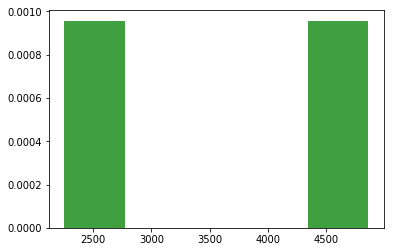

In [2]:
KAFKA_HOST = 'ip-172-31-31-133.ec2.internal:6667'
TOPIC = 'twitter'

def getTweets():
    consumer = KafkaConsumer(TOPIC, bootstrap_servers=[KAFKA_HOST], consumer_timeout_ms=100000)
    hdfs = HDFileSystem('hdfs://ip-172-31-16-126.ec2.internal', 8020, 'root')
    f = hdfs.open('/user/root/processed_data/tweets.json', 'wb')
    positive = 0
    negative = 0
    for message in consumer:
        tweet = message.value.decode('utf-8')
        print(tweet)
        json.dump(tweet, f)
        f.write(tweet)
        f.write('\n')
        tweet_prop = TextBlob(tweet)
        polarity = tweet_prop.sentiment.polarity
        if polarity > 0:
            positive += 1
        else:
            negative += 1
    f.close()
    plt.hist([positive, negative], 5, normed=1, facecolor='green', alpha=0.75)
    plt.show()
    
if __name__ == '__main__':
    getTweets()